# 프로젝트 주제: 5일후의 주식(KOSPI)의 등락을 예측

- 미래에셋의 데이터로 머신러닝을 활용해 코스피 등락 예측
- 피처 엔지니어링 중 뉴스기사 데이터 활용해 변수로 활용

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
economic = pd.read_csv('2019빅데이터페스티벌데이터/ECONOMIC.csv', encoding = 'cp949')
exchange = pd.read_csv('2019빅데이터페스티벌데이터/EXCHANGE.csv', encoding = 'cp949')
kospi = pd.read_csv('2019빅데이터페스티벌데이터/KOSPI_국면분석.csv', encoding = 'cp949')
market = pd.read_csv('2019빅데이터페스티벌데이터/MARKET.csv', encoding = 'cp949')
per = pd.read_csv('2019빅데이터페스티벌데이터/PER.csv', encoding = 'cp949')

## Economic 데이터 셋 

* 2001-01-31부터 2018-12-31 까지의 월간 데이터 -> 오버샘플링 필요
* (216, 399)이며 399개의 컬럼 별 201부터 216개의 데이터 존재 -> 칼럼 추출 필요

In [3]:
economic.head()

날짜  15세이상인구[구직기간4주]  4주평균신규실업보험청구자수NSA[미국]  4주평균신규실업보험청구자수SA[미국]  \
0  2001-01-31            36405              500976.00                340000   
1  2001-02-28            36434              381069.75                371250   
2  2001-03-31            36463              354263.20                387200   
3  2001-04-30            36491              366959.75                396750   
4  2001-05-31            36525              338172.25                394500   

   Baker Hughes 석유시추회수 월간합계  CPI(원지수)[미국]  CoreCPI(계절조정)[미국]  \
0                   1118.00         175.1              183.9   
1                   1135.75         175.8              184.4   
2                   1163.20         176.2              184.7   
3                   1205.75         176.9              185.1   
4                   1234.00         177.7              185.3   

   CoreCPI(원지수)[미국]  ICT설비투자지수(계절조정)  ICT설비투자지수(원지수)  ...  통화량[중국](M0)  \
0             183.5             89.5            82.8  ...     1701.898   
1             184.4             86.8            82.9  ...     1491.039   
2             185.3             84.7            91.2  ...     1436.212   
3             185.6             95.2            95.0  ...     1462.299   
4             185.5             84.6            83.2  ...     1394.228   

   통화량[중국](M1)  통화량[중국](M2)  통화량증가율[중국](M2)  필라델피아연준지수[미국]  한은 기준금리  \
0     5440.623    13754.363            13.5          -36.2     5.25   
1     5199.768    13621.017            12.0          -29.2     5.00   
2     5303.336    13874.446            13.2          -20.3     5.00   
3     5326.132    13994.985            12.8          -10.5     5.00   
4     5254.299    13813.597            11.4          -11.8     5.00   

   홍콩 소매매출증가율  홍콩 통화량(M2)  회사채유통수익률(%)(후행)  후행종합지수(2015=100)  
0       69.65  3634603.55              8.1              54.7  
1       52.23  3611668.04              7.6              54.8  
2       60.42  3554703.37              7.2              55.2  
3       60.10  3578822.09              7.3              55.6  
4       63.60  3596418.27              7.6              56.1  

[5 rows x 399 columns]

In [4]:
economic.isnull().sum().sum()

717

In [148]:
economic.columns

Index(['날짜', '15세이상인구[구직기간4주]', '4주평균신규실업보험청구자수NSA[미국]',
       '4주평균신규실업보험청구자수SA[미국]', 'Baker Hughes 석유시추회수 월간합계', 'CPI(원지수)[미국]',
       'CoreCPI(계절조정)[미국]', 'CoreCPI(원지수)[미국]', 'ICT설비투자지수(계절조정)',
       'ICT설비투자지수(원지수)',
       ...
       '통화량[중국](M0)', '통화량[중국](M1)', '통화량[중국](M2)', '통화량증가율[중국](M2)',
       '필라델피아연준지수[미국]', '한은 기준금리', '홍콩 소매매출증가율', '홍콩 통화량(M2)',
       '회사채유통수익률(%)(후행)', '후행종합지수(2015=100)'],
      dtype='object', length=399)

In [177]:
eco=economic[['날짜','NAHB주택시장지수[미국]','OECD 경기선행지수[중국]','OECD경기선행지수[미국]','OECD경기선행지수[한국]',
               '경기선행지수[미국]','경상수지','고용률[구직기간4주]','공공부채','구인구직비율(%)(선행)','금융수지',
               '무역수지','상품수지','상품수출','상품지수(총지수)','선행종합지수(2015=100)','소비자기대지수(선행)',
               '소비자물가(전체)[중국]','소비자물가[미국]', '소비자물가증가율[중국]','소비자신뢰지수(컨퍼런스보드)[미국]',
               '수입물가지수(총지수)','수입액','수출국(미국)','수출국(중국)','수출물가지수(총지수)','수출액','수출입물가비율(2005=100)(선)',
               '실업률[미국_SA]','실업률[한국]','외환보유액','외환보유액(금제외)','외환보유액[한국](전체)','자본수지','코스피지수(1980.1.4=100)(선행)',
               '한은 기준금리']]


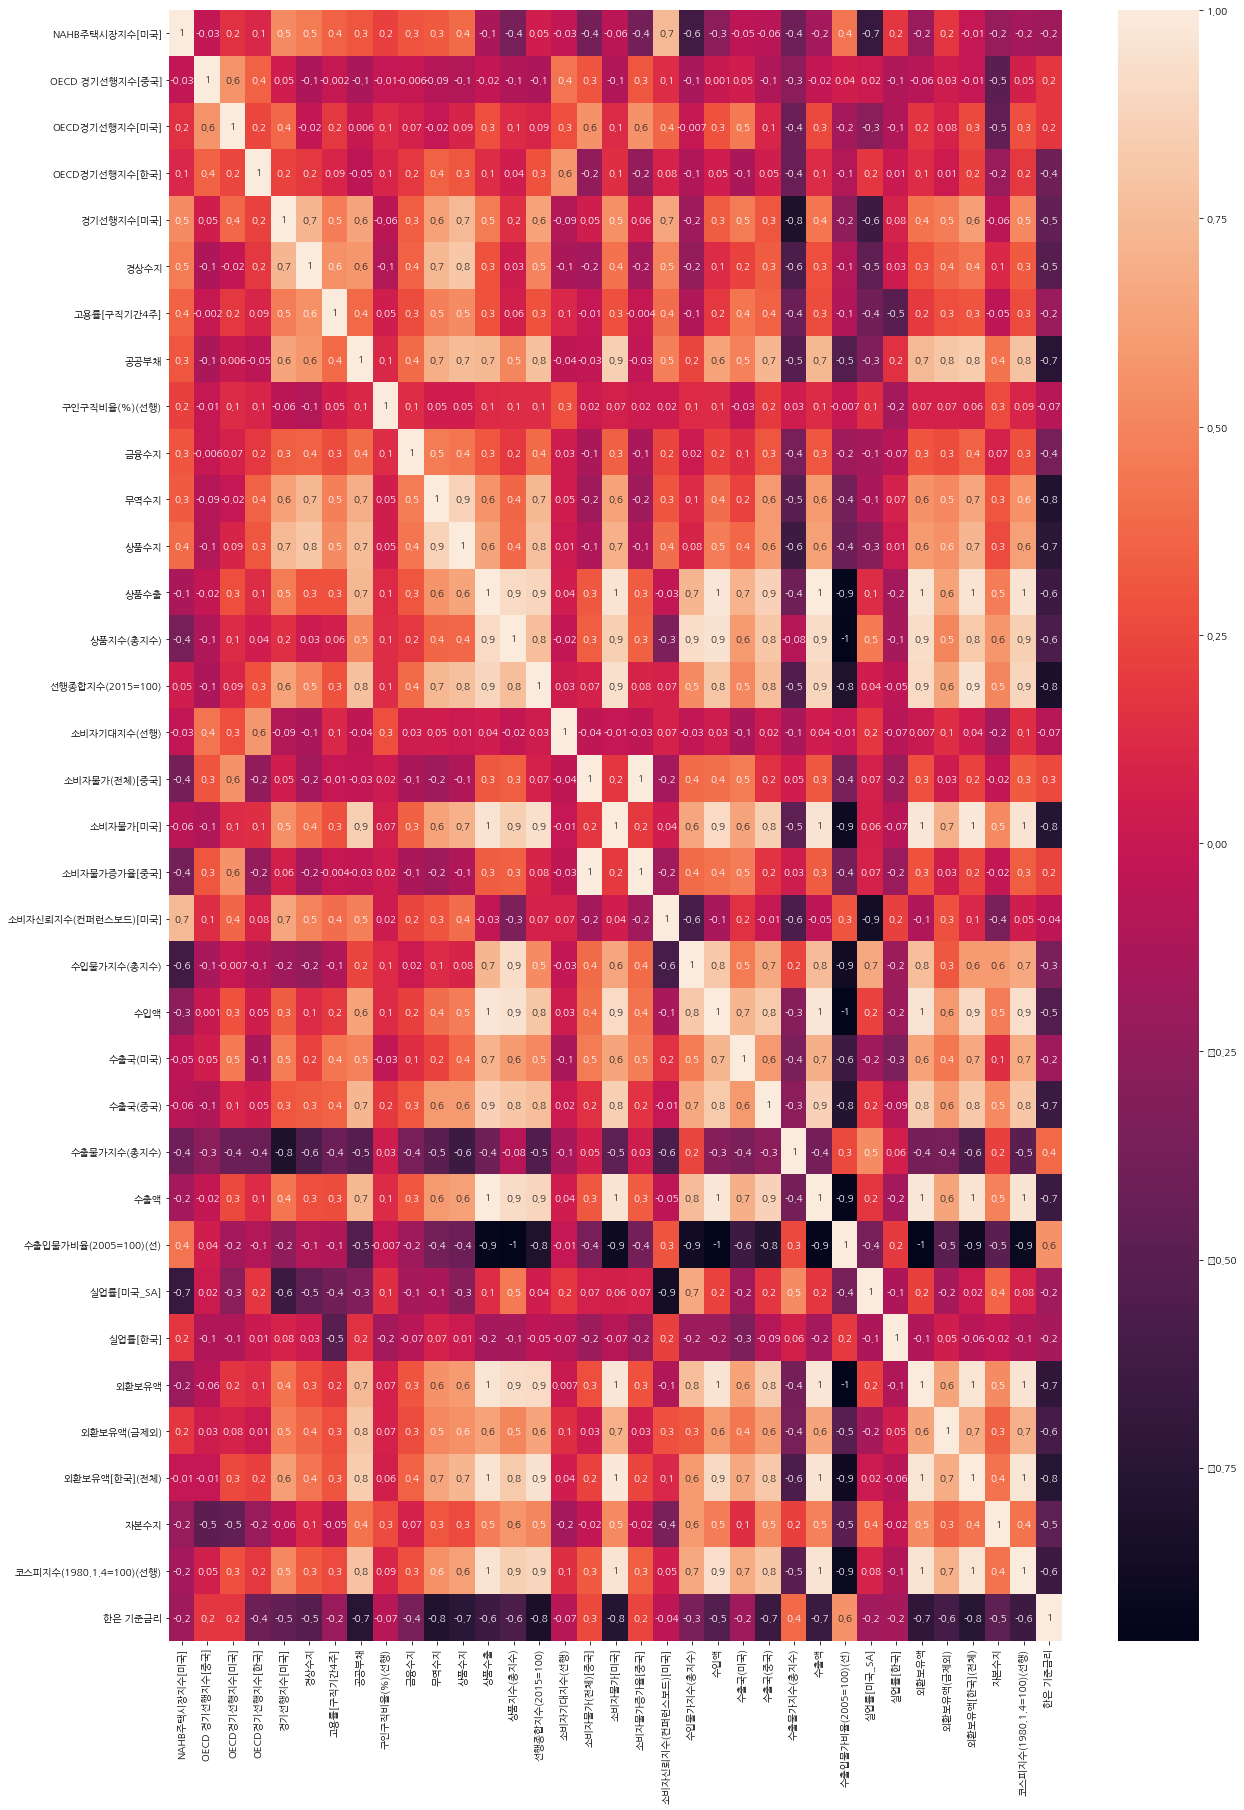

In [152]:
sns.heatmap(eco.corr(), annot=True, fmt='.1g')

In [188]:
kospi_f.merge(eco, on='날짜',how='left')

날짜     지수종가  종가이동평균_10        거래량  거래량이동평균_5        자본금  전체종목수  \
0     2001-01-02   520.95        NaN  231014600        NaN   84895076    902   
1     2001-01-03   521.43        NaN  324584400        NaN   84868436    902   
2     2001-01-04   558.02        NaN  444540900        NaN   84873582    902   
3     2001-01-05   580.85        NaN  578286000        NaN   84885103    902   
4     2001-01-08   586.65        NaN  558645100  19.873264   84853590    902   
...          ...      ...        ...        ...        ...        ...    ...   
4444  2018-12-21  2061.49   2068.791  311388800  19.819547  107914395    900   
4445  2018-12-24  2055.01   2068.913  285275000  19.737655  107972455    900   
4446  2018-12-26  2028.01   2066.417  321499300  19.678019  108073277    900   
4447  2018-12-27  2028.44   2061.004  398021300  19.666131  108148532    901   
4448  2018-12-28  2041.04   2055.553  352677700  19.625970  108148442    901   

      상승종목수  하락종목수  보합종목수  ...  수출액  수출입물가비율(2005=100)(선)  실업률[미국_SA]  \
0       618    215     22  ...  NaN                   NaN         NaN   
1       488    316     52  ...  NaN                   NaN         NaN   
2       752     83     20  ...  NaN                   NaN         NaN   
3       427    393     37  ...  NaN                   NaN         NaN   
4       533    278     45  ...  NaN                   NaN         NaN   
...     ...    ...    ...  ...  ...                   ...         ...   
4444    381    445     70  ...  NaN                   NaN         NaN   
4445    285    538     71  ...  NaN                   NaN         NaN   
4446    128    724     44  ...  NaN                   NaN         NaN   
4447    521    331     45  ...  NaN                   NaN         NaN   
4448    577    253     67  ...  NaN                   NaN         NaN   

      실업률[한국]  외환보유액  외환보유액(금제외)  외환보유액[한국](전체)  자본수지  \
0         NaN    NaN         NaN            NaN   NaN   
1         NaN    NaN         NaN            NaN   NaN   
2         NaN    NaN         NaN            NaN   NaN   
3         NaN    NaN         NaN            NaN   NaN   
4         NaN    NaN         NaN            NaN   NaN   
...       ...    ...         ...            ...   ...   
4444      NaN    NaN         NaN            NaN   NaN   
4445      NaN    NaN         NaN            NaN   NaN   
4446      NaN    NaN         NaN            NaN   NaN   
4447      NaN    NaN         NaN            NaN   NaN   
4448      NaN    NaN         NaN            NaN   NaN   

      코스피지수(1980.1.4=100)(선행)  한은 기준금리  
0                         NaN      NaN  
1                         NaN      NaN  
2                         NaN      NaN  
3                         NaN      NaN  
4                         NaN      NaN  
...                       ...      ...  
4444                      NaN      NaN  
4445                      NaN      NaN  
4446                      NaN      NaN  
4447                      NaN      NaN  
4448                      NaN      NaN  

[4449 rows x 52 columns]

## Exchange 데이터셋

* USD, EUR, CNY, JPY, GBP
* 2000-01-01부터 2018-12-31까지의 데이터 셋
* 3756~4768개의 데이터가 존재 -> 널 값 처리 필요

In [238]:
exchange

날짜     USD      EUR     CNY      JPY      GBP
0     2001-01-02  1259.7  1185.38  152.19  1099.07  1885.02
1     2001-01-03  1267.8  1205.49  153.15  1108.07  1903.35
2     2001-01-04  1285.4  1193.24  155.29  1128.53  1914.15
3     2001-01-05  1249.3  1190.90  150.92  1078.01  1876.82
4     2001-01-08  1267.8  1215.06  153.16  1088.71  1906.33
...          ...     ...      ...     ...      ...      ...
4762  2018-12-27  1125.6  1278.29  163.20  1012.23  1422.93
4763  2018-12-28  1121.3  1281.81  162.60  1010.95  1417.88
4764  2018-12-29  1121.3  1281.81  162.60  1010.95  1417.88
4765  2018-12-30  1121.3  1281.81  162.60  1010.95  1417.88
4766  2018-12-31  1118.1  1279.16  162.76  1013.18  1420.32

[4767 rows x 6 columns]

In [236]:
exchange['날짜']!=kospi['날짜']

ValueError: Can only compare identically-labeled Series objects

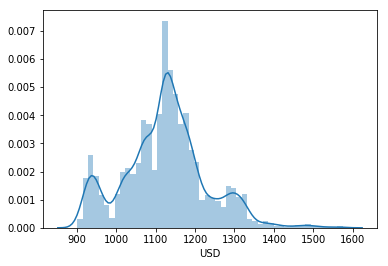

In [7]:
#sns.lineplot(x='날짜', y= 'USD', data = exchange)
sns.distplot(exchange['USD'])

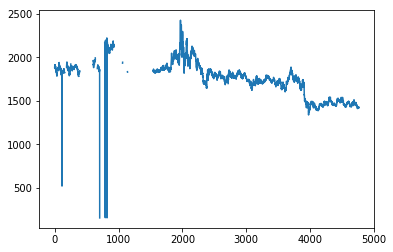

In [8]:
exchange['GBP'].plot()

In [139]:
exchange.isnull().sum()

날짜        0
USD       0
EUR     220
CNY    1193
JPY      72
GBP    1012
dtype: int64

In [239]:
ecg=exchange[['날짜','USD']]
#ecg=ecg.merge(kospi[['날짜','변동률']], on='날짜')

## KOSPI 데이터 셋

* 국면분석용/트레이딩 용으로 나눠짐
* 국면분석은 상승과 하락을 예측하고, 트레이딩은 매수/매도 시그널 생성 후 누적수익률을 최대화하는 알고리즘을 개발

* 코스피관련 칼럼들 존재 
* 2001-01-02부터 2018-12-28까지의 데이터

* 총 4449개 데이터 개수와 31개의 컬럼수 존재

In [9]:
kospi.head()

날짜   Y    지수시가    지수고가    지수저가    지수종가        거래량     거래대금  \
0  2001-01-02  상승  503.31  521.34  500.97  520.95  231014600  1223328   
1  2001-01-03  상승  512.74  524.58  510.70  521.43  324584400  1583403   
2  2001-01-04  상승  551.53  567.16  550.91  558.02  444540900  2984761   
3  2001-01-05  상승  559.54  581.41  555.40  580.85  578286000  3569582   
4  2001-01-08  상승  573.72  587.91  572.48  586.65  558645100  2948092   

      상장주식수       시가총액  ...  보합종목수  상한종목수  하한종목수  연중최고가종목수  연중최저가종목수  \
0  19638887  191252891  ...     22    167     16         0         0   
1  19633559  191363161  ...     52     85      6         0         0   
2  19634734  204074166  ...     20    149      3         0         0   
3  19637038  212089180  ...     37     92      9         0         0   
4  19630735  214231273  ...     45     72      5         0         0   

   25일이평상회종목건수  25일이평하회종목건수  52주신고가종목수  52주신저가종목수  배당 수익율  
0           26           73          1         85     0.0  
1           28           71          1         12     0.0  
2           42           57          1          2     0.0  
3           43           56          3          2     0.0  
4           43           56          6          1     0.0  

[5 rows x 31 columns]

In [10]:
kospi.shape

(4449, 31)

In [11]:
kospi.isnull().sum()

날짜             0
Y              0
지수시가           0
지수고가           0
지수저가           0
지수종가           0
거래량            0
거래대금           0
상장주식수          0
시가총액           0
자본금            0
외국인보유주식수       0
외국인보유시가총액      0
신용거래종목수        0
신용가능종목거래량      0
신용자료일자         1
전체종목수          0
회사수            0
거래형성종목수        0
상승종목수          0
하락종목수          0
보합종목수          0
상한종목수          0
하한종목수          0
연중최고가종목수       0
연중최저가종목수       0
25일이평상회종목건수    0
25일이평하회종목건수    0
52주신고가종목수      0
52주신저가종목수      0
배당 수익율         0
dtype: int64

In [12]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

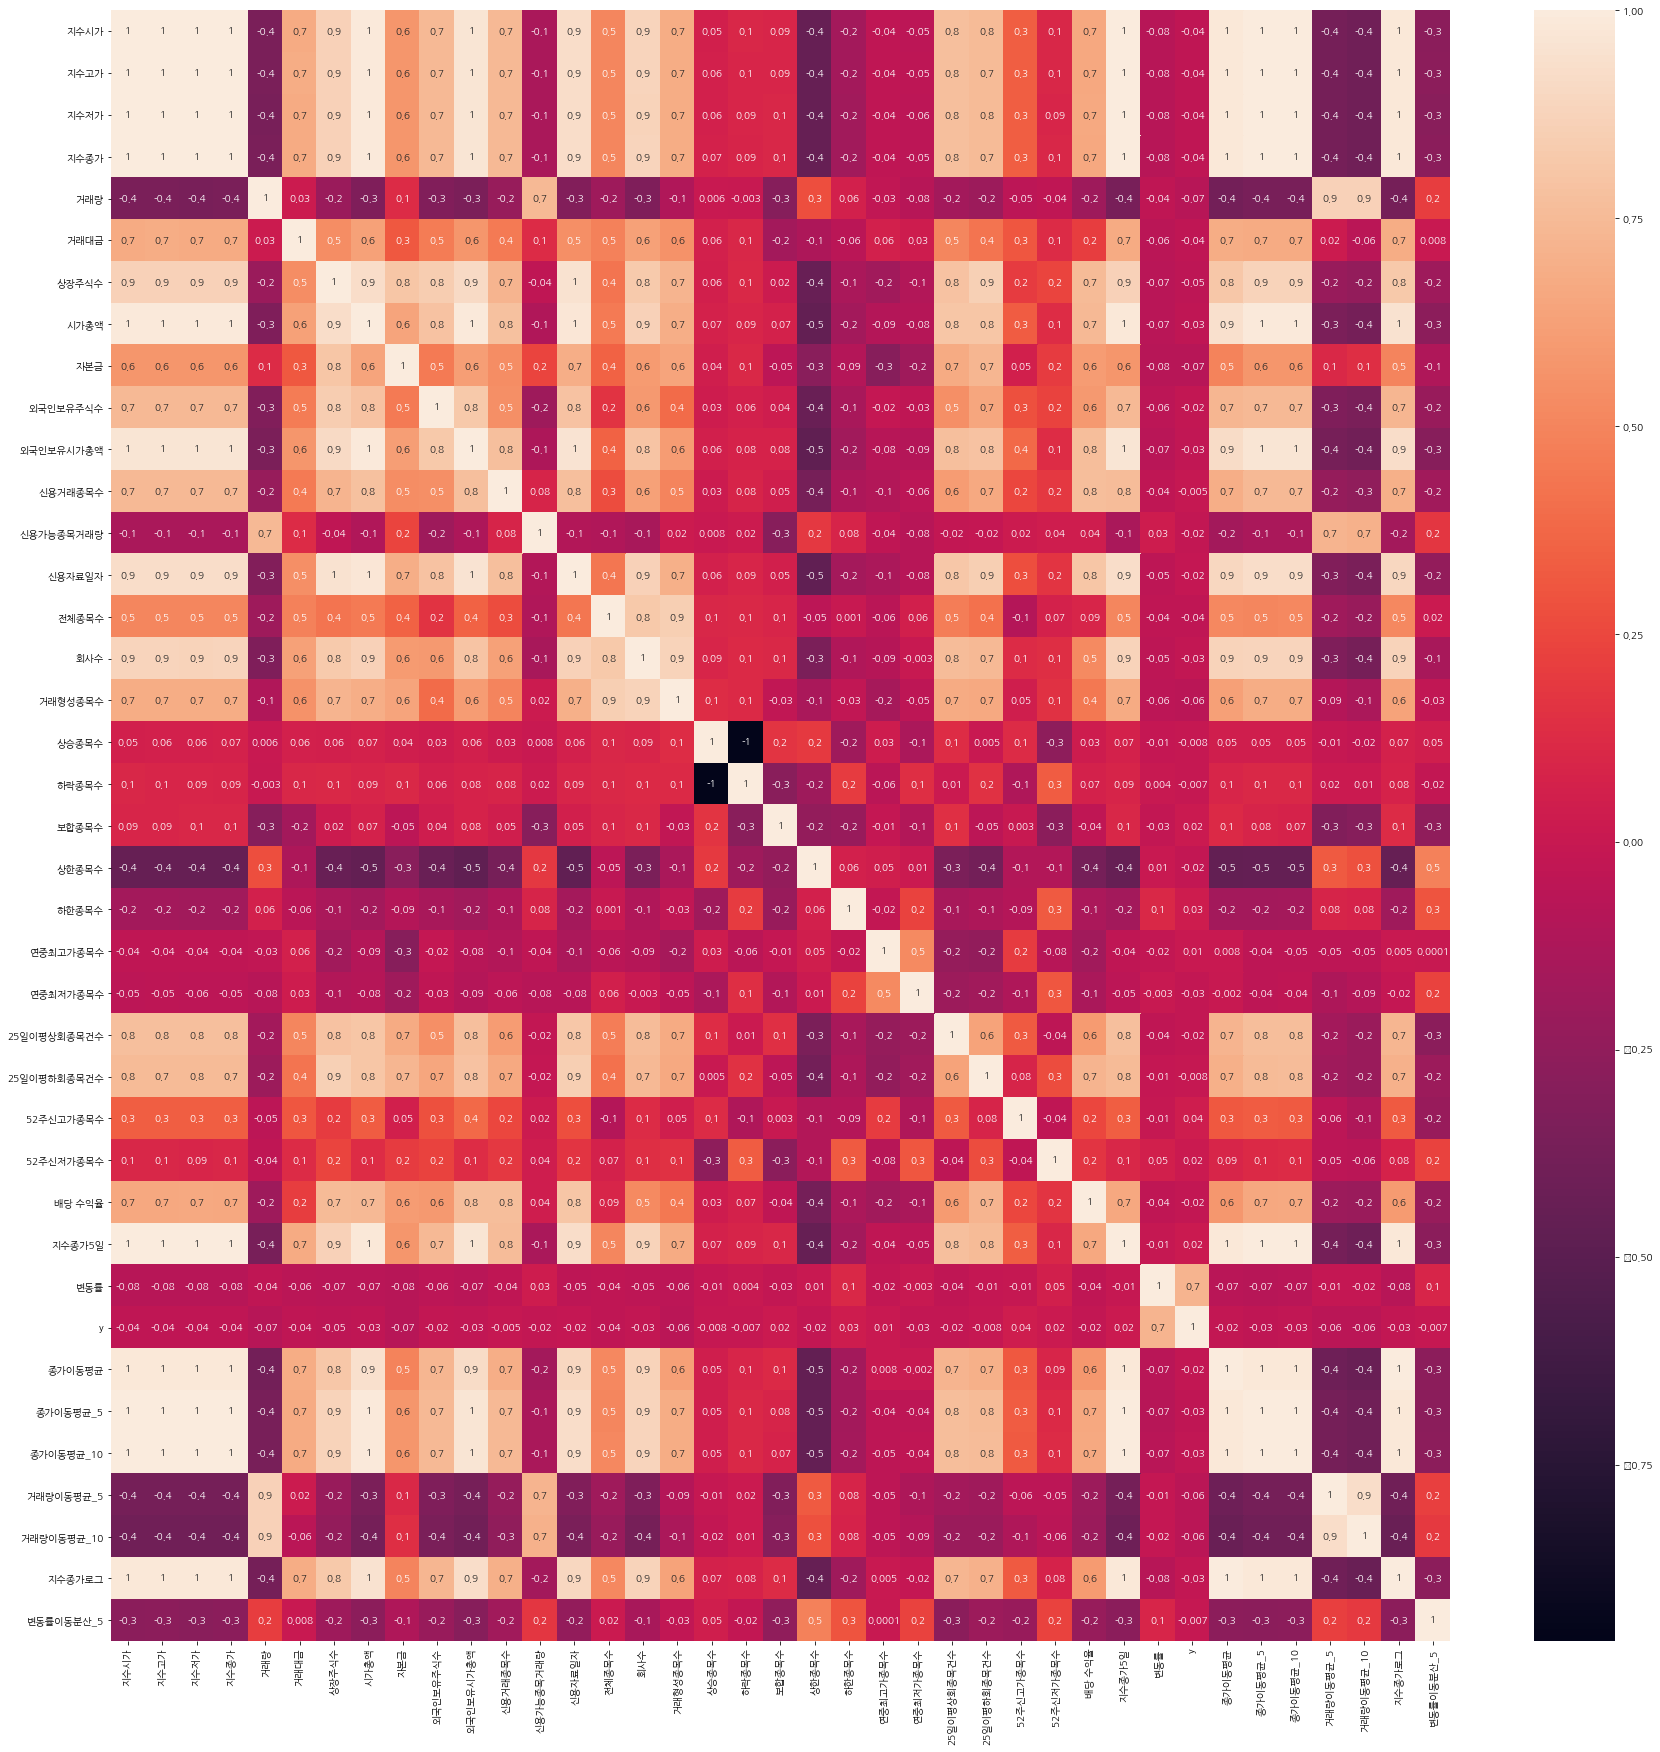

In [105]:
corr=kospi.corr()
plt.figure(figsize=(30,30))

sns.heatmap(corr, annot=True, fmt='.1g')

In [14]:
#5일 후의 지수종가의 차이 값 => 상승률
kospi['지수종가5일']=kospi['지수종가'].shift(-5)

In [15]:
kospi["변동률"] = (kospi['지수종가5일']-kospi['지수종가'])*100/kospi['지수종가']

In [16]:
kospi['y']=kospi['Y'].replace("상승",1)

In [17]:
kospi['y']=kospi['y'].replace("하락",0)

In [173]:
kospi.tail(15)

날짜   Y     지수시가     지수고가     지수저가     지수종가        거래량     거래대금  \
4434  2018-12-07  하락  2081.68  2086.84  2065.62  2075.76  371590500  4318800   
4435  2018-12-10  상승  2048.45  2061.78  2043.21  2053.79  344164000  4697529   
4436  2018-12-11  상승  2058.16  2060.94  2047.17  2052.97  273932700  5020321   
4437  2018-12-12  하락  2062.77  2084.77  2061.13  2082.57  457126800  5613049   
4438  2018-12-13  하락  2087.43  2104.43  2084.37  2095.55  379818900  7941965   
4439  2018-12-14  하락  2095.64  2095.64  2061.40  2069.38  448237500  5784241   
4440  2018-12-17  하락  2071.21  2075.93  2065.51  2071.09  444522400  4764477   
4441  2018-12-18  하락  2057.39  2074.31  2054.26  2062.11  429530000  5241610   
4442  2018-12-19  하락  2068.95  2080.65  2063.01  2078.84  418796700  5124894   
4443  2018-12-20  하락  2063.70  2071.08  2047.52  2060.12  421064800  5483090   
4444  2018-12-21  하락  2052.70  2061.51  2049.76  2061.49  311388800  5492537   
4445  2018-12-24  하락  2050.38  2059.94  2046.18  2055.01  285275000  3843849   
4446  2018-12-26  하락  2028.81  2037.83  2014.28  2028.01  321499300  5424078   
4447  2018-12-27  상승  2032.09  2035.57  2021.39  2028.44  398021300  5351003   
4448  2018-12-28  하락  2036.70  2046.97  2035.41  2041.04  352677700  4120695   

         상장주식수        시가총액  ...   지수종가5일       변동률  y    종가이동평균  종가이동평균_5  \
4434  52344614  1389034610  ...  2069.38 -0.307357  0  2.034566  2098.408   
4435  52344614  1373936929  ...  2071.09  0.842345  1  2.033589  2082.780   
4436  52344614  1373342570  ...  2062.11  0.445209  1  2.032815  2070.504   
4437  51813561  1371559153  ...  2078.84 -0.179106  0  2.032577  2066.756   
4438  51803027  1379759767  ...  2060.12 -1.690726  0  2.032917  2072.128   
4439  51804576  1362231208  ...  2061.49 -0.381274  0  2.032837  2070.852   
4440  51815743  1363331838  ...  2055.01 -0.776403  0  2.033055  2074.312   
4441  51835749  1358110562  ...  2028.01 -1.653646  0  2.033171  2076.140   
4442  51845579  1368928570  ...  2028.44 -2.424429  0  2.033124  2075.394   
4443  51845581  1356169265  ...  2041.04 -0.926160  0  2.032676  2068.308   
4444  51871131  1357352795  ...      NaN       NaN  0  2.032576  2066.730   
4445  51987246  1352900455  ...      NaN       NaN  0  2.032372  2063.514   
4446  52009400  1336757289  ...      NaN       NaN  0  2.031938  2056.694   
4447  52094807  1335555861  ...      NaN       NaN  1  2.031294  2046.614   
4448  52094789  1343971857  ...      NaN       NaN  0  2.031049  2042.798   

      종가이동평균_10  거래량이동평균_5   거래량이동평균_10    지수종가로그  변동률이동분산_5  
4434   2099.366  19.966464  385740530.0  7.638083  -1.293804  
4435   2096.443  19.926267  396385840.0  7.627442  -0.392290  
4436   2091.798  19.816833  399857980.0  7.627043   0.277356  
4437   2089.233  19.799056  415563080.0  7.641358   0.419899  
4438   2087.378  19.716302  422821960.0  7.647571  -0.177927  
4439   2084.630  19.757407  424910250.0  7.635004  -0.192710  
4440   2078.546  19.808793  425703660.0  7.635830  -0.516460  
4441   2073.322  19.883582  417904870.0  7.631485  -0.936231  
4442   2071.075  19.865671  410512910.0  7.639565  -1.385295  
4443   2070.218  19.884932  398878430.0  7.630520  -1.232382  
4444   2068.791  19.819547  392858260.0  7.631184        NaN  
4445   2068.913  19.737655  386969360.0  7.628036        NaN  
4446   2066.417  19.678019  391726020.0  7.614810        NaN  
4447   2061.004  19.666131  385815470.0  7.615022        NaN  
4448   2055.553  19.625970  383101350.0  7.621215        NaN  

[15 rows x 41 columns]

In [57]:
kospi['종가이동평균_5']=kospi['지수종가'].rolling(window=5).mean()
kospi['종가이동평균_10']=kospi['지수종가'].rolling(window=10).mean()
kospi['거래량이동평균_5']=kospi['거래량'].rolling(window=5).mean()
kospi['거래량이동평균_10']=kospi['거래량'].rolling(window=10).mean()


In [64]:
kospi['지수종가로그']=np.log(kospi['지수종가'])
kospi['종가이동평균']=np.log(kospi['종가이동평균'])
kospi['거래량이동평균_5']=np.log(kospi['거래량이동평균_5'])

In [52]:
corr.iloc[0,:]>abs(0.7)

지수시가            True
지수고가            True
지수저가            True
지수종가            True
거래량            False
거래대금           False
상장주식수           True
시가총액            True
자본금            False
외국인보유주식수        True
외국인보유시가총액       True
신용거래종목수         True
신용가능종목거래량      False
신용자료일자          True
전체종목수          False
회사수             True
거래형성종목수        False
상승종목수          False
하락종목수          False
보합종목수          False
상한종목수          False
하한종목수          False
연중최고가종목수       False
연중최저가종목수       False
25일이평상회종목건수     True
25일이평하회종목건수     True
52주신고가종목수      False
52주신저가종목수      False
배당 수익율         False
지수종가5일          True
변동률            False
y              False
종가이동평균          True
종가이동평균_5        True
종가이동평균_10       True
거래량이동평균_5      False
거래량이동평균_10     False
Name: 지수시가, dtype: bool

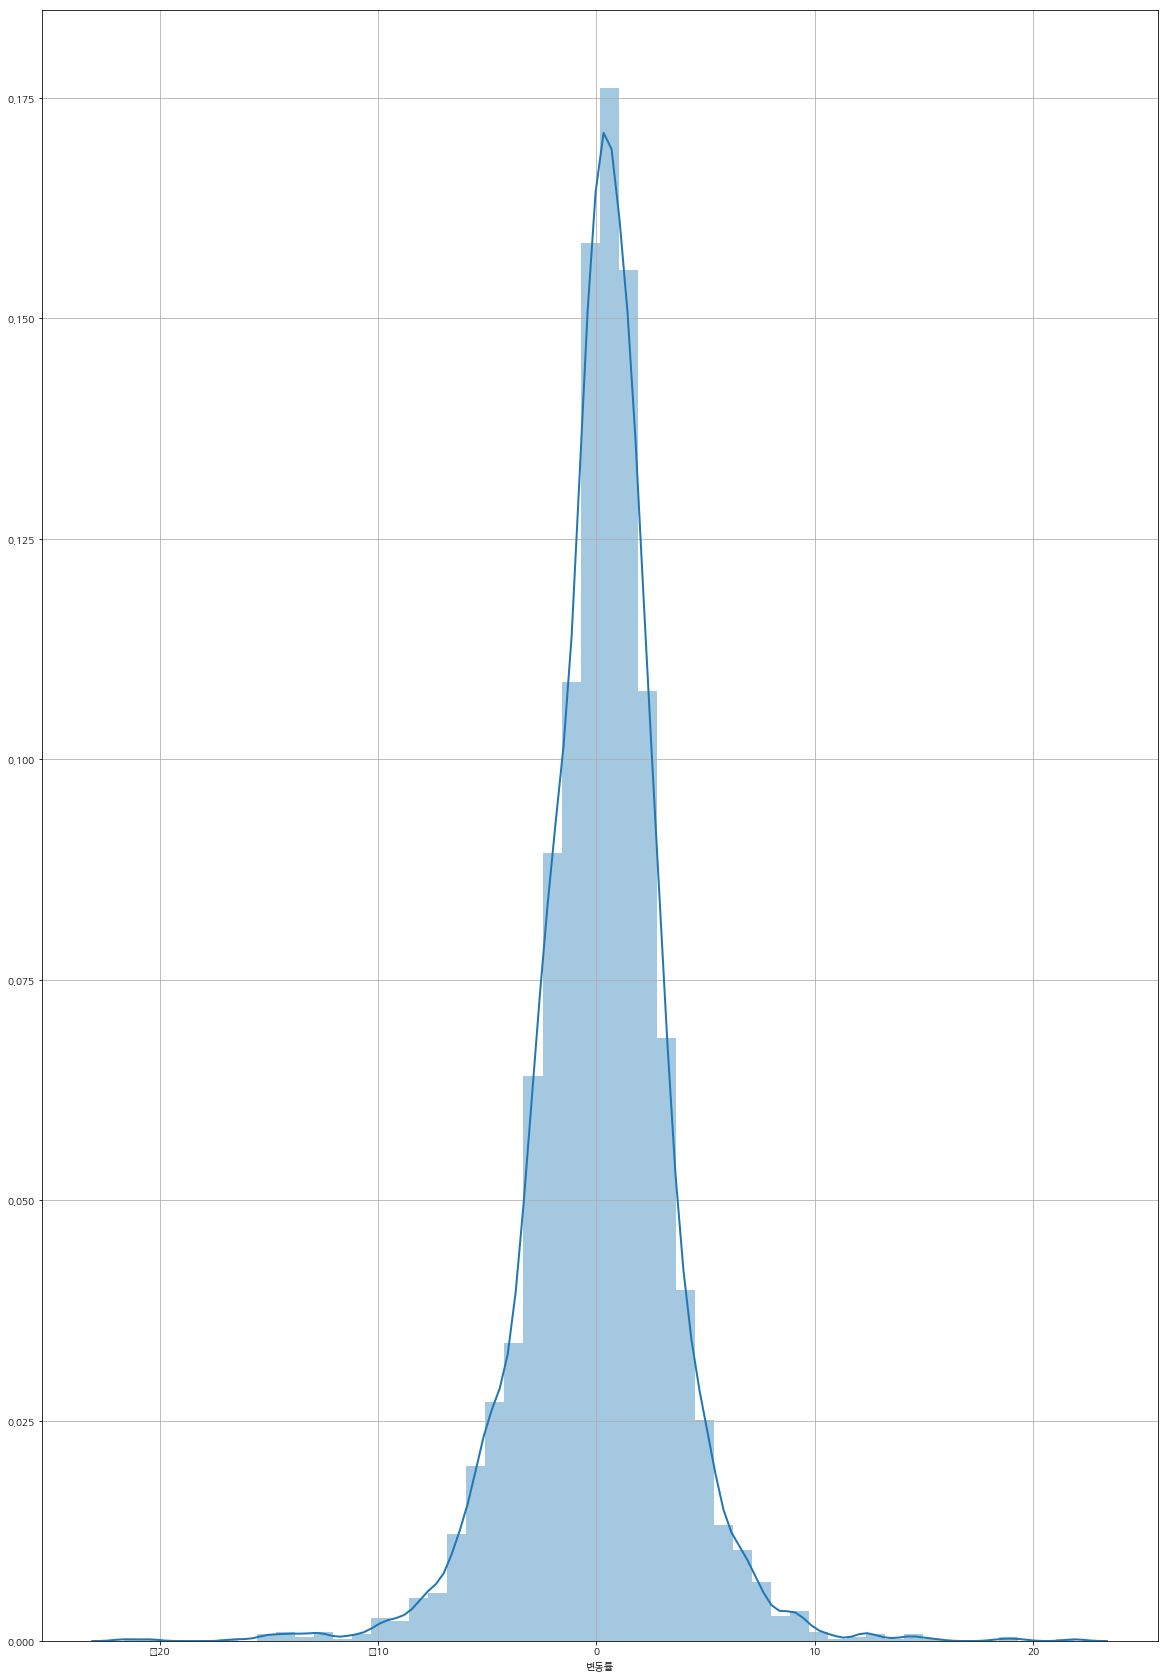

In [70]:
sns.distplot(kospi['변동률'])

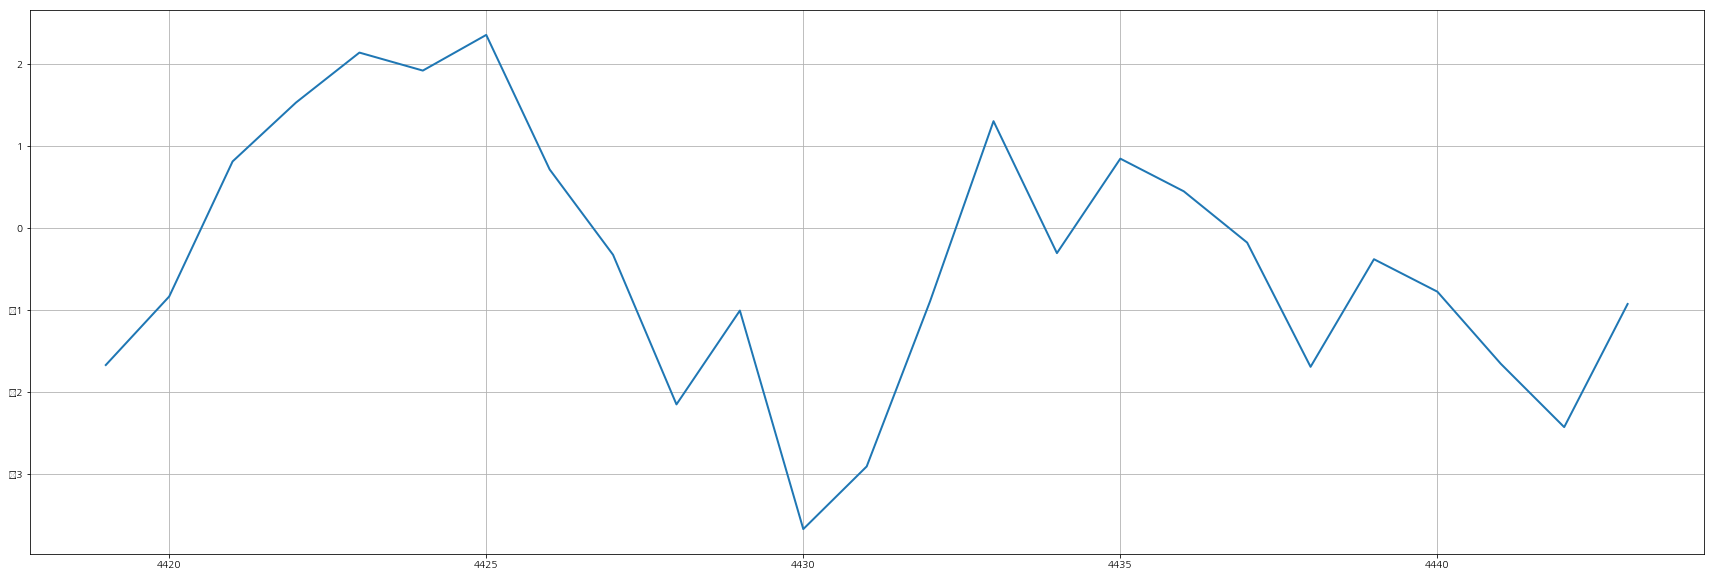

In [77]:
plt.figure(figsize=(30,10))

kospi['변동률'].tail(30).plot()

In [123]:
from sklearn.decomposition import PCA

pca_k=PCA(n_components=2)
kospi_x = kospi.drop(['날짜','Y','변동률','y','지수종가5일','종가이동평균','지수종가로그','변동률이동분산_5'], axis=1)
kospi_y = kospi['변동률']
kospi_x= kospi_x.fillna(0)
x_low=pca_k.fit_transform(kospi_x)

In [124]:
pca_k.explained_variance_ratio_

array([0.70356576, 0.24714239])

In [129]:
x_lowc=x_low.copy()
x_lowc=pd.DataFrame(x_lowc.reshape(4449,2), columns=['pc1','pc2'])

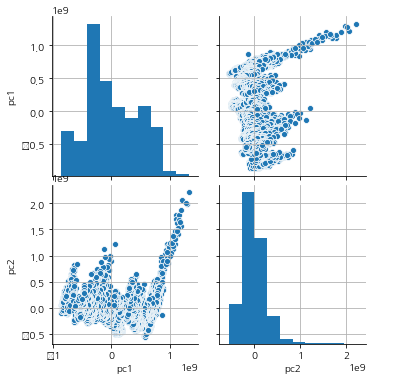

In [136]:
sns.pairplot(x_lowc)
plt.show()

In [190]:
kospi_f=kospi[['날짜','지수종가','종가이동평균_5','거래량','거래량이동평균_5','자본금','전체종목수'
               ,'상승종목수','하락종목수','보합종목수','상한종목수','하한종목수','연중최고가종목수','연중최저가종목수'
              , '52주신고가종목수','52주신저가종목수','변동률']]

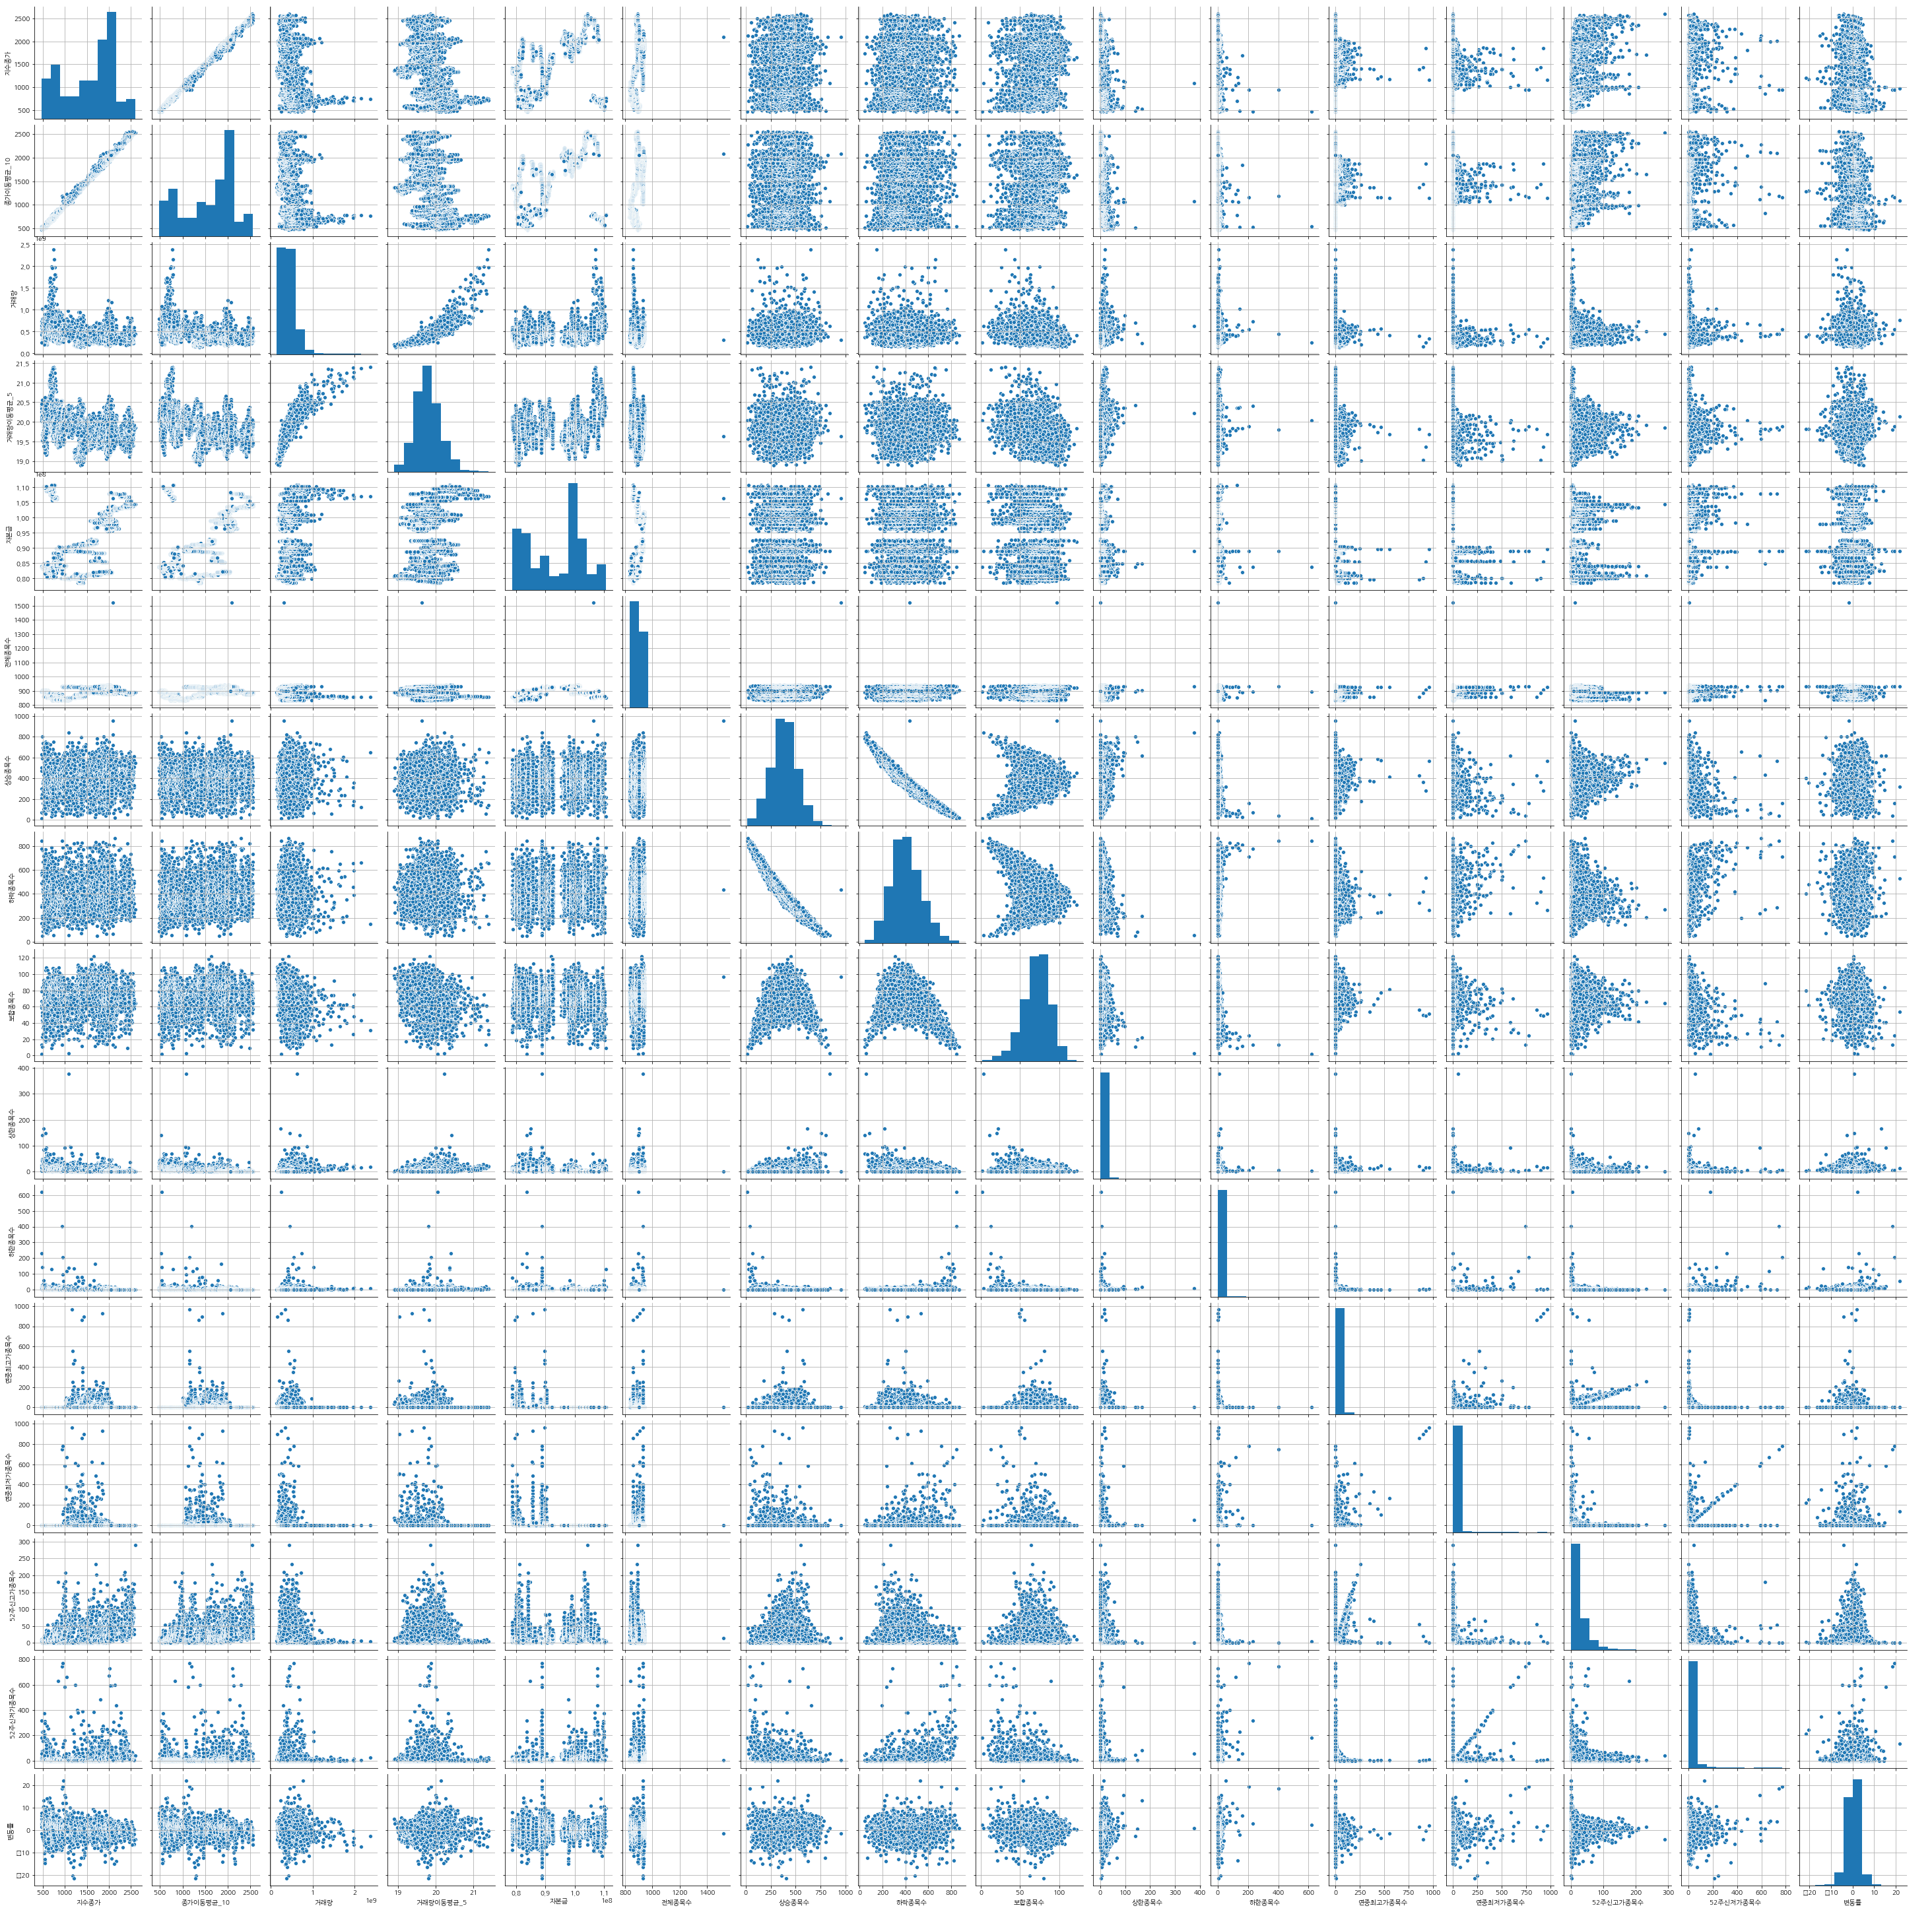

In [138]:
sns.pairplot(kospi_f)
plt.show()

<Figure size 720x1080 with 0 Axes>

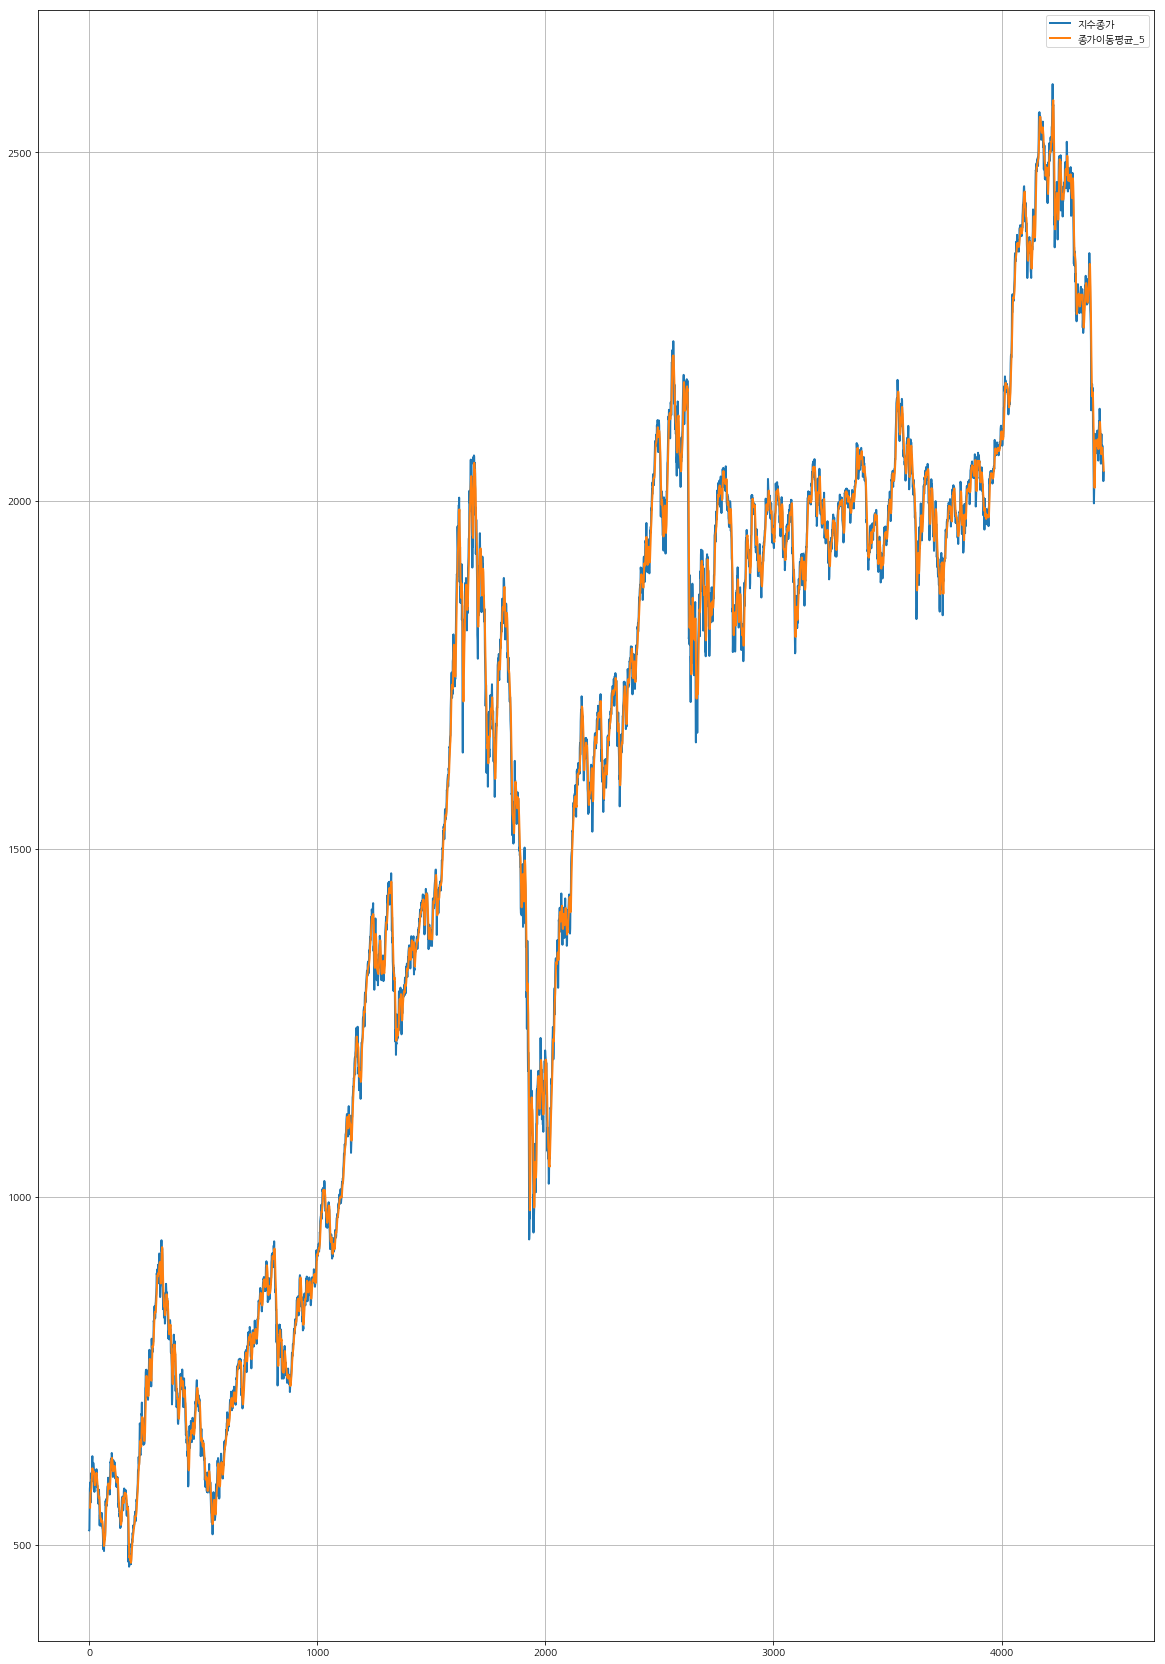

In [195]:
plt.figure(figsize=(10,15))

kospi_f[['지수종가','종가이동평균_5']].plot()

## Market 데이터 셋

* 시장 상품들
* 2000년부터 2018년까지 시작과 종료 날짜가 상품별로 다름

In [20]:
market.head()

날짜  A등급 구리(현물)  니켈(현물)  알루미늄 99.7%(현물)  금괴(일간)  미국1년  미국3년  미국10년  \
0  2000-01-03         NaN     NaN             NaN   291.0   6.1   6.4    6.6   
1  2000-01-04      1829.8  8295.0          1611.3   281.3   6.0   6.3    6.5   
2  2000-01-05      1840.0  8289.0          1630.5   280.5   6.1   6.4    6.6   
3  2000-01-06      1833.8  8238.5          1635.3   279.4   6.0   6.4    6.5   
4  2000-01-07      1841.4  8162.0          1648.0   282.3   6.0   6.4    6.5   

   국고채권(1년)  국고채권(3년)  국고채권(10년)  Dram Exchange 지수  브랜트유 가격  원유 WTI  
0       NaN       NaN        NaN               NaN      NaN     NaN  
1       8.9       9.0        NaN               NaN     24.4    25.6  
2       9.0       9.1        NaN               NaN     23.7    24.9  
3       9.0       9.2        NaN               NaN     23.6    24.8  
4       9.0       9.2        NaN               NaN     23.1    24.2

In [21]:
market.isnull().sum()

날짜                    0
A등급 구리(현물)          151
니켈(현물)              153
알루미늄 99.7%(현물)      150
금괴(일간)               37
미국1년                179
미국3년                159
미국10년                84
국고채권(1년)            245
국고채권(3년)            245
국고채권(10년)           480
Dram Exchange 지수    600
브랜트유 가격              86
원유 WTI              169
dtype: int64

In [22]:
market.describe()

A등급 구리(현물)        니켈(현물)  알루미늄 99.7%(현물)       금괴(일간)         미국1년  \
count   4805.000000   4803.000000     4806.000000  4919.000000  4777.000000   
mean    5312.086868  15560.596794     1921.596650   907.078797     1.867050   
std     2432.719994   8061.656435      429.403998   463.019662     1.838339   
min     1318.300000   4346.000000     1242.500000   256.000000     0.100000   
25%     3016.000000   9916.500000     1574.925000   417.350000     0.300000   
50%     5925.300000  14061.000000     1856.300000   951.000000     1.300000   
75%     7243.300000  18557.500000     2168.950000  1275.000000     2.800000   
max    10179.500000  54050.000000     3271.300000  1898.300000     6.400000   

              미국3년        미국10년     국고채권(1년)     국고채권(3년)    국고채권(10년)  \
count  4797.000000  4872.000000  4711.000000  4711.000000  4476.000000   
mean      2.351636     3.508518     3.672723     3.951857     4.296358   
std       1.655490     1.229254     1.635662     1.706478     1.503094   
min       0.300000     1.400000     1.200000     1.200000     1.400000   
25%       1.000000     2.400000     2.500000     2.700000     3.000000   
50%       1.900000     3.500000     3.400000     3.800000     4.600000   
75%       3.600000     4.500000     4.900000     5.000000     5.400000   
max       6.900000     6.800000     9.100000     9.600000     8.000000   

       Dram Exchange 지수      브랜트유 가격       원유 WTI  
count       4356.000000  4870.000000  4787.000000  
mean        6416.050666    65.295914    62.118947  
std         6771.936607    30.726661    26.816001  
min          794.700000    17.700000    17.500000  
25%         3000.575000    38.725000    38.550000  
50%         3678.700000    61.150000    59.500000  
75%         6150.775000    89.800000    84.900000  
max        29785.700000   146.100000   145.300000

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E37C181EC8>,
      dtype=object)

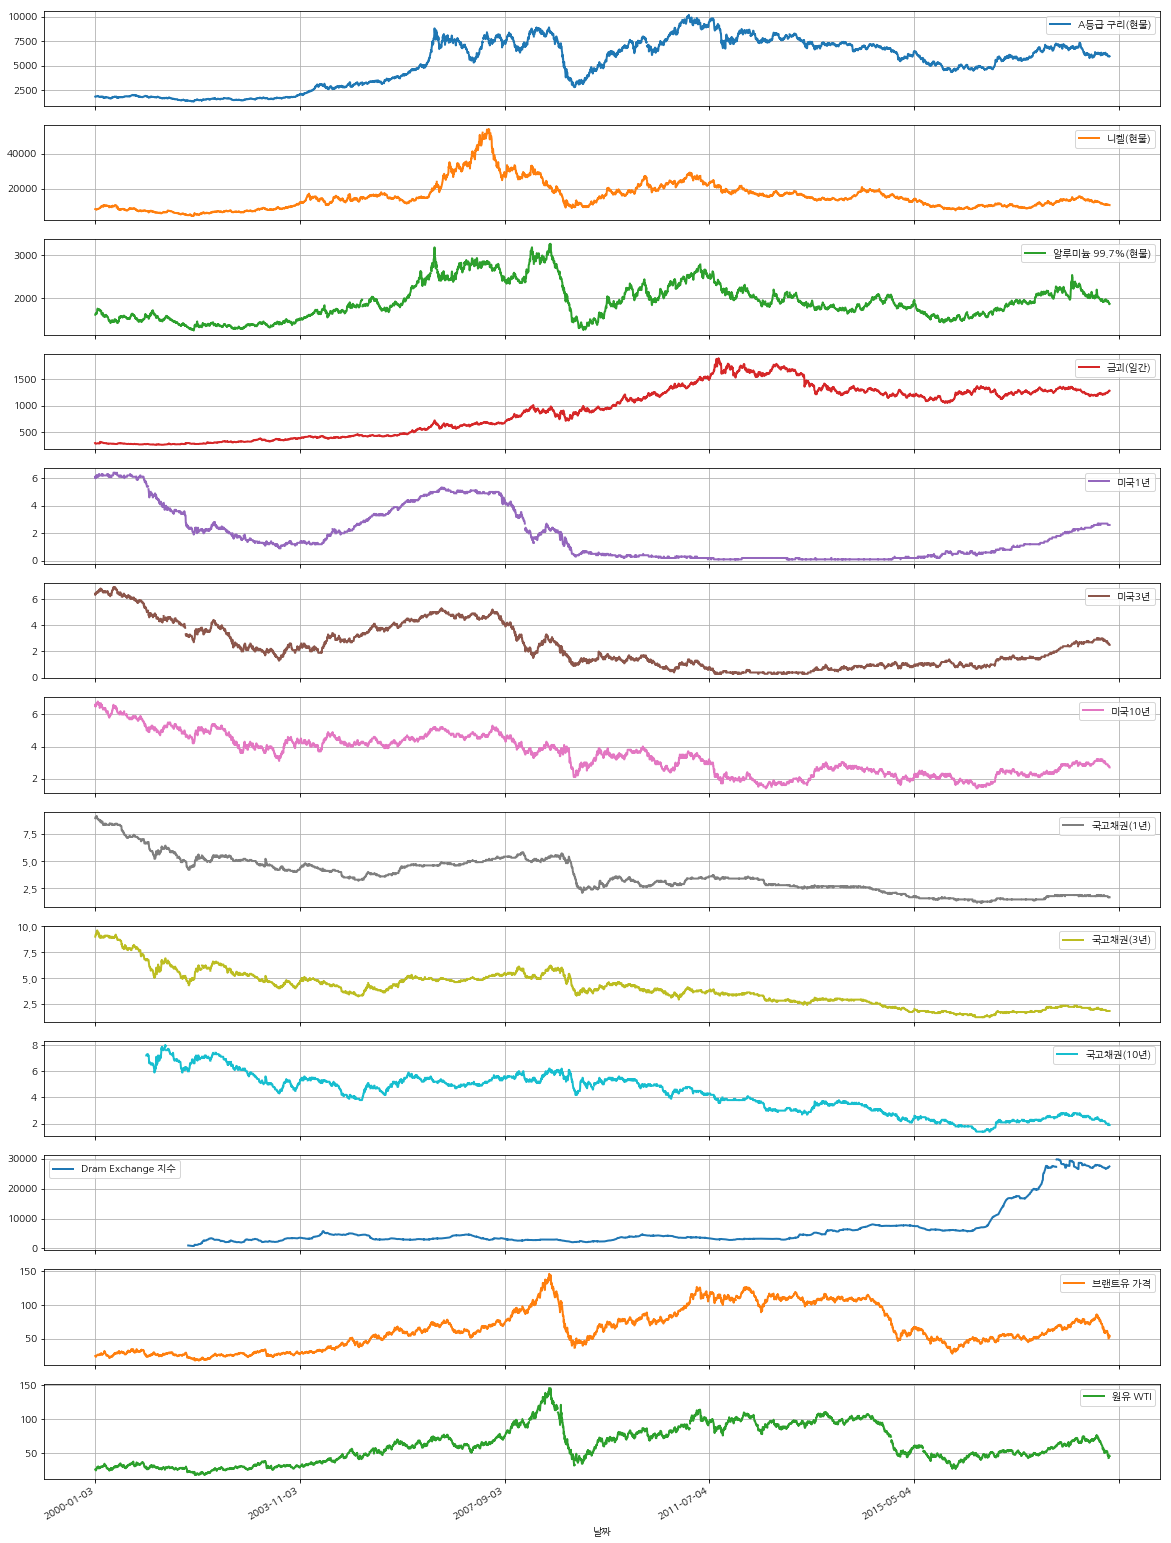

In [23]:
plt.rcParams["figure.figsize"] = (20,30)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

market.plot(subplots = True, x = '날짜')

In [252]:
mm=market.merge(kospi[['날짜','변동률']], on="날짜")
mm=mm[['날짜','금괴(일간)','국고채권(10년)','원유 WTI']]

In [253]:
mm

날짜  금괴(일간)  국고채권(10년)  원유 WTI
0     2001-01-02   270.6        7.2    27.2
1     2001-01-03   267.5        7.2    28.0
2     2001-01-04   267.7        6.9    28.1
3     2001-01-05   268.2        6.7    28.0
4     2001-01-08   268.3        6.6    27.3
...          ...     ...        ...     ...
4444  2018-12-21  1259.9        2.0    45.6
4445  2018-12-24  1265.5        2.0    42.5
4446  2018-12-26  1278.6        1.9    46.2
4447  2018-12-27  1275.3        1.9    44.6
4448  2018-12-28  1277.5        1.9    45.3

[4449 rows x 4 columns]

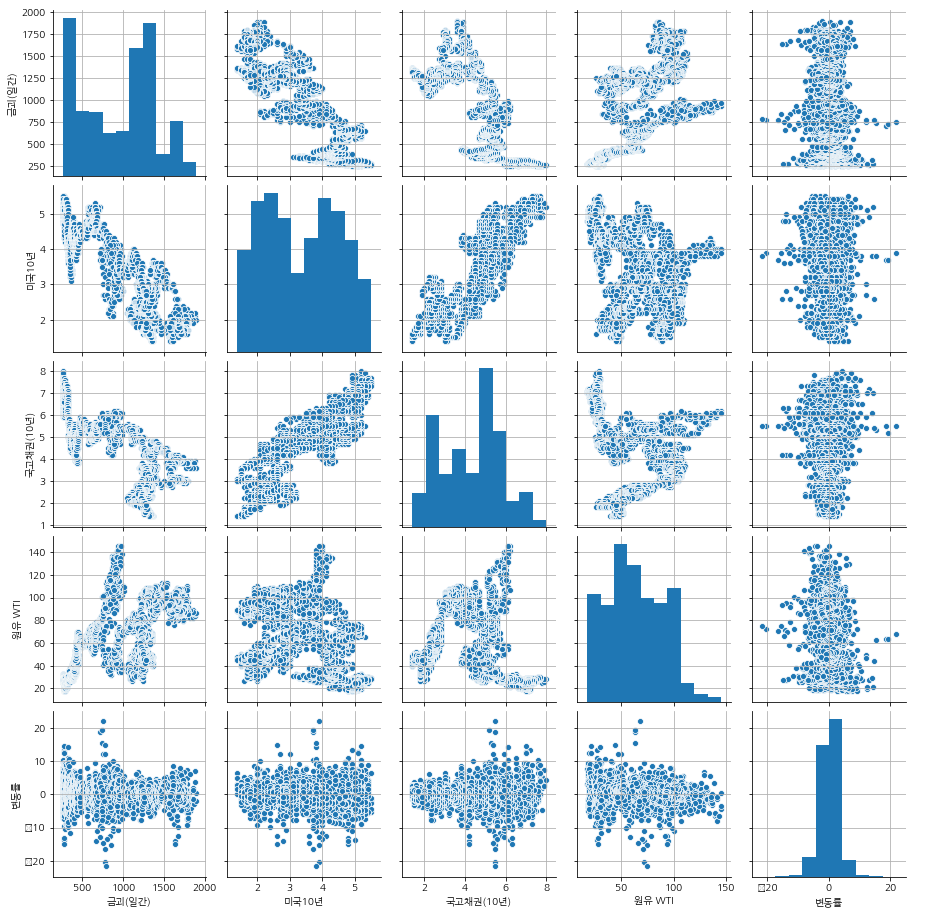

In [172]:
sns.pairplot(mm)
plt.show()

## PER 데이터 셋

* 데이터셋 개수도 상품별로 상이함
* 2000년부터 2018년까지 시작과 종료 날짜가 상품별로 다름

In [24]:
per.isnull().sum().sum()

0

In [25]:
per[per['코스피']=='-']

날짜 코스피 코스피 200 코스피 100 코스피 50 코스피 대형주 코스피 중형주 코스피 소형주   제조업  \
0    2000-01-04   -       -       -      -       -       -       -     -   
1    2000-01-05   -       -       -      -       -       -       -     -   
2    2000-01-06   -       -       -      -       -       -       -     -   
3    2000-01-07   -       -       -      -       -       -       -     -   
4    2000-01-10   -       -       -      -       -       -       -     -   
..          ...  ..     ...     ...    ...     ...     ...     ...   ...   
61   2000-03-31   -       -       -      -       -       -       -     -   
308  2001-04-12   -   14.66   12.95  13.36   12.61    4.85    7.35  9.83   
309  2001-04-13   -   14.66   12.95  13.34   12.64    4.91    7.46  9.86   
310  2001-04-16   -   14.48   12.78  13.15   12.48    4.89    7.48  9.74   
311  2001-04-17   -   14.66   12.94  13.33   12.64    4.92    7.52  9.76   

      음식료품  ...    유통업  전기가스업   건설업  운수창고업     통신업  금융업 은행      증권     보험  \
0    10.38  ...      -  18.74     -  11.41  226.37    -  -  148.48  11.81   
1     9.89  ...      -   17.8     -  11.56  193.78    -  -  147.66  11.44   
2      9.5  ...      -  18.22     -  10.77  193.92    -  -  136.15  10.75   
3     9.61  ...      -  19.04     -  10.68  181.93    -  -  138.84  11.07   
4     9.76  ...      -  19.19     -  10.72  200.17    -  -  140.46  12.71   
..     ...  ...    ...    ...   ...    ...     ...  ... ..     ...    ...   
61    9.21  ...      -  16.65     -   9.15  159.30    -  -  135.81   8.82   
308   5.83  ...  14.33   7.42     3      -   18.40    -  -   18.88      -   
309   5.88  ...  14.56   7.37  3.11      -   18.53    -  -   18.81      -   
310   5.85  ...  14.35   7.33  3.09      -   17.99    -  -   18.56      -   
311   5.83  ...  14.39   7.53  3.15      -   18.53    -  -   18.95      -   

      서비스업  
0        -  
1        -  
2        -  
3        -  
4        -  
..     ...  
61       -  
308  13.84  
309  13.89  
310  13.65  
311  13.76  

[66 rows x 30 columns]

In [26]:
per.head()

날짜 코스피 코스피 200 코스피 100 코스피 50 코스피 대형주 코스피 중형주 코스피 소형주 제조업   음식료품  \
0  2000-01-04   -       -       -      -       -       -       -   -  10.38   
1  2000-01-05   -       -       -      -       -       -       -   -   9.89   
2  2000-01-06   -       -       -      -       -       -       -   -    9.5   
3  2000-01-07   -       -       -      -       -       -       -   -   9.61   
4  2000-01-10   -       -       -      -       -       -       -   -   9.76   

   ... 유통업  전기가스업 건설업  운수창고업     통신업  금융업 은행      증권     보험 서비스업  
0  ...   -  18.74   -  11.41  226.37    -  -  148.48  11.81    -  
1  ...   -   17.8   -  11.56  193.78    -  -  147.66  11.44    -  
2  ...   -  18.22   -  10.77  193.92    -  -  136.15  10.75    -  
3  ...   -  19.04   -  10.68  181.93    -  -  138.84  11.07    -  
4  ...   -  19.19   -  10.72  200.17    -  -  140.46  12.71    -  

[5 rows x 30 columns]

In [27]:
per.describe()

철강금속          통신업
count  4690.000000  4690.000000
mean     10.416245    17.251827
std       4.341753    23.306346
min       3.470000     5.650000
25%       7.770000     8.830000
50%       9.870000    10.785000
75%      12.237500    16.050000
max      29.860000   226.370000

In [28]:
per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       4690 non-null   object 
 1   코스피      4690 non-null   object 
 2   코스피 200  4690 non-null   object 
 3   코스피 100  4690 non-null   object 
 4   코스피 50   4690 non-null   object 
 5   코스피 대형주  4690 non-null   object 
 6   코스피 중형주  4690 non-null   object 
 7   코스피 소형주  4690 non-null   object 
 8   제조업      4690 non-null   object 
 9   음식료품     4690 non-null   object 
 10  섬유의복     4690 non-null   object 
 11  종이목재     4690 non-null   object 
 12  화학       4690 non-null   object 
 13  의약품      4690 non-null   object 
 14  비금속광물    4690 non-null   object 
 15  철강금속     4690 non-null   float64
 16  기계       4690 non-null   object 
 17  전기전자     4690 non-null   object 
 18  의료정밀     4690 non-null   object 
 19  운수장비     4690 non-null   object 
 20  유통업      4690 non-null   object 
 21  전기가스업    4690 

In [80]:
per_object = per.drop(['철강금속','통신업'],axis = 1)
per_object = per_object.apply(lambda x: x.str.replace(',',''))
per_object = per_object.replace({'-':np.nan})
per_object

날짜   코스피 코스피 200 코스피 100 코스피 50 코스피 대형주 코스피 중형주 코스피 소형주   제조업  \
0     2000-01-04   NaN     NaN     NaN    NaN     NaN     NaN     NaN   NaN   
1     2000-01-05   NaN     NaN     NaN    NaN     NaN     NaN     NaN   NaN   
2     2000-01-06   NaN     NaN     NaN    NaN     NaN     NaN     NaN   NaN   
3     2000-01-07   NaN     NaN     NaN    NaN     NaN     NaN     NaN   NaN   
4     2000-01-10   NaN     NaN     NaN    NaN     NaN     NaN     NaN   NaN   
...          ...   ...     ...     ...    ...     ...     ...     ...   ...   
4685  2018-12-21  9.68    8.64    8.36   8.09    9.02   12.15   23.77  8.88   
4686  2018-12-24  9.65    8.62    8.35   8.08    9.01   12.07   23.56  8.87   
4687  2018-12-26  9.53     8.5    8.25      8     8.9   11.84   23.15  8.79   
4688  2018-12-27  9.53    8.49    8.22   7.96    8.88   11.99   23.38  8.82   
4689  2018-12-28  9.58    8.53    8.26      8    8.92   12.06   23.67  8.87   

       음식료품  ...   운수장비   유통업  전기가스업    건설업  운수창고업   금융업    은행      증권     보험  \
0     10.38  ...    NaN   NaN  18.74    NaN  11.41   NaN   NaN  148.48  11.81   
1      9.89  ...    NaN   NaN   17.8    NaN  11.56   NaN   NaN  147.66  11.44   
2       9.5  ...    NaN   NaN  18.22    NaN  10.77   NaN   NaN  136.15  10.75   
3      9.61  ...    NaN   NaN  19.04    NaN  10.68   NaN   NaN  138.84  11.07   
4      9.76  ...    NaN   NaN  19.19    NaN  10.72   NaN   NaN  140.46  12.71   
...     ...  ...    ...   ...    ...    ...    ...   ...   ...     ...    ...   
4685   11.4  ...  53.68  9.63    NaN  13.34  26.89  7.86  6.03    8.01  10.87   
4686  11.33  ...  53.59  9.55    NaN  13.13  26.54  7.83  5.96    7.97  10.98   
4687  11.12  ...  52.15  9.35    NaN   12.8   26.1   7.7   5.9     7.8  10.85   
4688  11.09  ...  52.35  9.42    NaN   13.1  26.49  7.56  5.66    7.69  10.57   
4689  11.22  ...  52.63  9.49    NaN  13.14  25.97   7.6  5.64    7.74  10.57   

       서비스업  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
...     ...  
4685  25.44  
4686  25.35  
4687  24.78  
4688  25.16  
4689  25.15  

[4690 rows x 28 columns]

In [30]:
per_object.isnull().sum()

코스피          66
코스피 200      62
코스피 100      62
코스피 50       62
코스피 대형주      62
코스피 중형주     657
코스피 소형주    1877
제조업          62
음식료품        225
섬유의복       1123
종이목재       2410
화학          313
의약품          18
비금속광물      2064
기계          840
전기전자         62
의료정밀       1251
운수장비         62
유통업         227
전기가스업       890
건설업        1824
운수창고업      1988
금융업         561
은행          506
증권          742
보험          473
서비스업         62
dtype: int64

In [206]:
per_m=per_object.merge(kospi[['날짜','변동률']], on = '날짜')

In [211]:
per_date=per_m['날짜']

In [212]:
per_m=per_m.iloc[:,1:].astype(float)

In [210]:
per_m.iloc[63:72]

날짜    코스피 코스피 200 코스피 100 코스피 50 코스피 대형주 코스피 중형주 코스피 소형주    제조업  \
63  2001-04-06  23.59   11.67   10.18  11.59   10.69    3.86    88.6    7.6   
64  2001-04-09  23.16   11.45    9.99  11.37   10.49    3.82   87.52   7.45   
65  2001-04-10  22.87   11.29    9.85   11.2   10.37     3.8   87.39   7.36   
66  2001-04-11  23.76   11.74   10.22  11.65   10.73    3.88    89.2   7.46   
67  2001-04-12    NaN   14.66   12.95  13.36   12.61    4.85    7.35   9.83   
68  2001-04-13    NaN   14.66   12.95  13.34   12.64    4.91    7.46   9.86   
69  2001-04-16    NaN   14.48   12.78  13.15   12.48    4.89    7.48   9.74   
70  2001-04-17    NaN   14.66   12.94  13.33   12.64    4.92    7.52   9.76   
71  2001-04-18  23.91   15.45   13.65  14.07   13.22    5.09    7.65  10.29   

    음식료품  ...    유통업 전기가스업   건설업 운수창고업  금융업     은행     증권   보험   서비스업  \
63  4.93  ...      6  7.54  2.95  1.79  NaN    NaN  18.37  NaN  11.34   
64  4.86  ...   5.99  7.37  2.89  1.75  NaN    NaN  17.88  NaN  11.14   
65  4.87  ...   5.88  7.43  2.86  1.73  NaN    NaN  17.34  NaN  11.05   
66  4.93  ...   6.06  7.74  2.91   1.8  NaN    NaN   18.3  NaN  11.19   
67  5.83  ...  14.33  7.42     3   NaN  NaN    NaN  18.88  NaN  13.84   
68  5.88  ...  14.56  7.37  3.11   NaN  NaN    NaN  18.81  NaN  13.89   
69  5.85  ...  14.35  7.33  3.09   NaN  NaN    NaN  18.56  NaN  13.65   
70  5.83  ...  14.39  7.53  3.15   NaN  NaN    NaN  18.95  NaN  13.76   
71  5.97  ...  14.91  7.82  3.23   NaN  NaN  17.37  21.18  NaN  14.19   

          변동률  
63   1.951721  
64   2.189121  
65   4.633456  
66   6.397651  
67   9.548628  
68   7.787251  
69  10.345235  
70   8.107477  
71   4.877778  

[9 rows x 29 columns]

In [100]:
per_m.isnull().sum()

코스피           4
코스피 200       0
코스피 100       0
코스피 50        0
코스피 대형주       0
코스피 중형주     595
코스피 소형주    1754
제조업           0
음식료품        225
섬유의복        882
종이목재       2169
화학          251
의약품          18
비금속광물      2002
기계          840
전기전자          0
의료정밀       1189
운수장비          0
유통업         165
전기가스업       890
건설업        1762
운수창고업      1988
금융업         320
은행          265
증권          742
보험          369
서비스업          0
변동률           5
dtype: int64

In [217]:
per_m

코스피  코스피 200  코스피 100  코스피 50  코스피 대형주  코스피 중형주  코스피 소형주   제조업   음식료품  \
0     15.89    13.34    10.92   12.32    10.83     3.12    23.45  8.33   4.54   
1     15.89    13.33    10.91   12.31    10.82     3.15    24.03  8.37   4.60   
2     16.99    14.29    11.70   13.22    11.61     3.33    25.20  9.01   4.69   
3     17.69    14.90    12.21   13.80    12.09     3.44    25.27  9.30   4.72   
4     17.87    15.04    12.32   13.91    12.20     3.51    25.86  9.40   4.72   
...     ...      ...      ...     ...      ...      ...      ...   ...    ...   
4444   9.68     8.64     8.36    8.09     9.02    12.15    23.77  8.88  11.40   
4445   9.65     8.62     8.35    8.08     9.01    12.07    23.56  8.87  11.33   
4446   9.53     8.50     8.25    8.00     8.90    11.84    23.15  8.79  11.12   
4447   9.53     8.49     8.22    7.96     8.88    11.99    23.38  8.82  11.09   
4448   9.58     8.53     8.26    8.00     8.92    12.06    23.67  8.87  11.22   

      섬유의복  ...   유통업  전기가스업    건설업  운수창고업   금융업    은행     증권     보험   서비스업  \
0      NaN  ...  5.15   8.94   6.54   1.96   NaN   NaN  14.08    NaN   9.84   
1      NaN  ...  5.11   8.81   6.69   2.01   NaN   NaN  14.43    NaN   9.98   
2      NaN  ...  5.45   9.18   7.42   2.15   NaN   NaN  16.56    NaN  10.51   
3      NaN  ...  5.91   9.48   8.21   2.36   NaN   NaN  18.39    NaN  10.83   
4      NaN  ...  6.08   9.43   8.17   2.33   NaN   NaN  18.62    NaN  11.03   
...    ...  ...   ...    ...    ...    ...   ...   ...    ...    ...    ...   
4444  6.33  ...  9.63    NaN  13.34  26.89  7.86  6.03   8.01  10.87  25.44   
4445  6.30  ...  9.55    NaN  13.13  26.54  7.83  5.96   7.97  10.98  25.35   
4446  6.20  ...  9.35    NaN  12.80  26.10  7.70  5.90   7.80  10.85  24.78   
4447  6.26  ...  9.42    NaN  13.10  26.49  7.56  5.66   7.69  10.57  25.16   
4448  6.39  ...  9.49    NaN  13.14  25.97  7.60  5.64   7.74  10.57  25.15   

            변동률  
0     13.239274  
1      7.552308  
2      0.675603  
3      1.208574  
4      2.105173  
...         ...  
4444        NaN  
4445        NaN  
4446        NaN  
4447        NaN  
4448        NaN  

[4449 rows x 28 columns]

In [222]:
per_f=pd.DataFrame()
#per_f['날짜']=per_date
per_f=per_m[['코스피 200','제조업','전기전자','운수장비','서비스업']]
per_f['날짜']=per_date

C:\Users\dldud\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [225]:
per_f.isnull().sum()

코스피 200    0
제조업        0
전기전자       0
운수장비       0
서비스업       0
날짜         0
dtype: int64

In [201]:
per_m[per_m['코스피'].isnull()]

코스피  코스피 200  코스피 100  코스피 50  코스피 대형주  코스피 중형주  코스피 소형주   제조업  음식료품  \
67  NaN    14.66    12.95   13.36    12.61     4.85     7.35  9.83  5.83   
68  NaN    14.66    12.95   13.34    12.64     4.91     7.46  9.86  5.88   
69  NaN    14.48    12.78   13.15    12.48     4.89     7.48  9.74  5.85   
70  NaN    14.66    12.94   13.33    12.64     4.92     7.52  9.76  5.83   

    섬유의복  ...    유통업  전기가스업   건설업  운수창고업  금융업  은행     증권  보험   서비스업        변동률  
67   NaN  ...  14.33   7.42  3.00    NaN  NaN NaN  18.88 NaN  13.84   9.548628  
68   NaN  ...  14.56   7.37  3.11    NaN  NaN NaN  18.81 NaN  13.89   7.787251  
69   NaN  ...  14.35   7.33  3.09    NaN  NaN NaN  18.56 NaN  13.65  10.345235  
70   NaN  ...  14.39   7.53  3.15    NaN  NaN NaN  18.95 NaN  13.76   8.107477  

[4 rows x 28 columns]

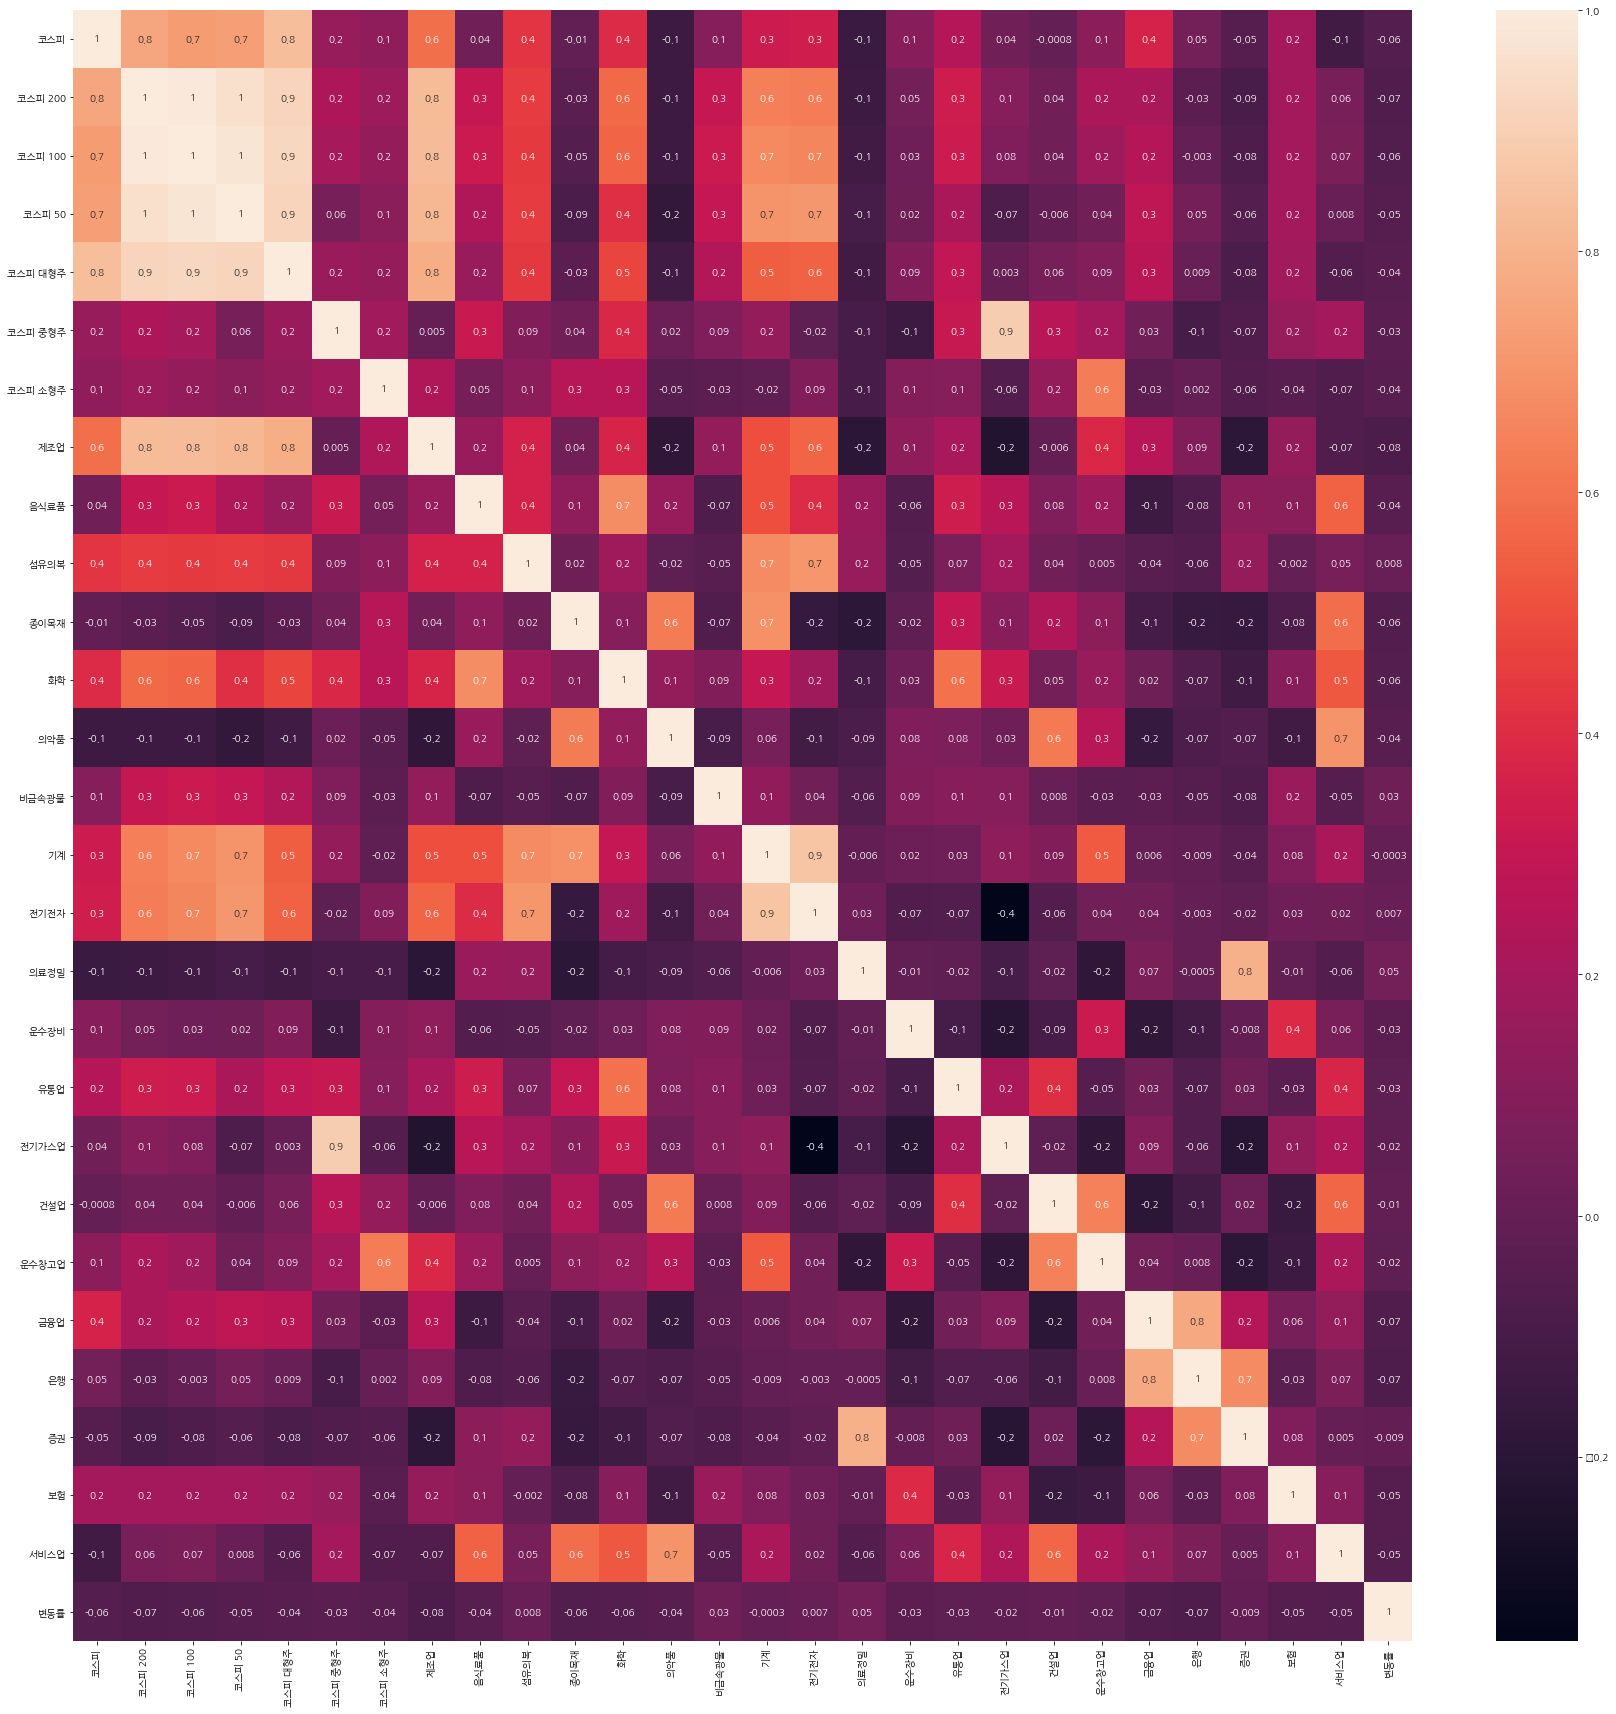

In [99]:
plt.figure(figsize=(30,30))

sns.heatmap(per_m.corr(), annot=True, fmt='.1g')

# 최종 변수 추출

In [196]:
mm

날짜  금괴(일간)  미국10년  국고채권(10년)  원유 WTI        변동률
0     2001-01-02   270.6    4.9        7.2    27.2  13.239274
1     2001-01-03   267.5    5.2        7.2    28.0   7.552308
2     2001-01-04   267.7    5.0        6.9    28.1   0.675603
3     2001-01-05   268.2    4.9        6.7    28.0   1.208574
4     2001-01-08   268.3    4.9        6.6    27.3   2.105173
...          ...     ...    ...        ...     ...        ...
4444  2018-12-21  1259.9    2.8        2.0    45.6        NaN
4445  2018-12-24  1265.5    2.8        2.0    42.5        NaN
4446  2018-12-26  1278.6    2.8        1.9    46.2        NaN
4447  2018-12-27  1275.3    2.7        1.9    44.6        NaN
4448  2018-12-28  1277.5    2.7        1.9    45.3        NaN

[4449 rows x 6 columns]

In [240]:
ecg

날짜     USD
0     2001-01-02  1259.7
1     2001-01-03  1267.8
2     2001-01-04  1285.4
3     2001-01-05  1249.3
4     2001-01-08  1267.8
...          ...     ...
4762  2018-12-27  1125.6
4763  2018-12-28  1121.3
4764  2018-12-29  1121.3
4765  2018-12-30  1121.3
4766  2018-12-31  1118.1

[4767 rows x 2 columns]

In [254]:
kospi_ff=kospi_f.merge(mm, on=['날짜'])
kospi_fff=kospi_ff.merge(ecg, on=['날짜'], how='left')

In [255]:
kospi_ffff=kospi_fff.merge(per_f, on=['날짜'])

In [229]:
final=pd.read_csv('final.csv')

In [332]:
final_2=pd.read_csv('final변동.csv')

In [333]:
final=final.iloc[:,1:]
final_2=final_2.iloc[:,1:]

In [334]:
final_2

날짜   Y  snp500  nasdaq shanghai
0     2001-01-02  상승  -1.81%  -7.23%    1.45%
1     2001-01-03  상승   4.81%  14.17%    0.97%
2     2001-01-04  상승  -1.07%  -1.91%   -0.31%
3     2001-01-05  상승  -3.26%  -6.20%    0.37%
4     2001-01-08  상승   0.77%  -0.49%   -1.09%
...          ...  ..     ...     ...      ...
4444  2018-12-21  하락  -2.62%  -2.99%   -0.79%
4445  2018-12-24  하락  -2.64%  -2.21%    0.43%
4446  2018-12-26  하락   5.05%   5.84%   -0.26%
4447  2018-12-27  상승   0.77%   0.38%   -0.61%
4448  2018-12-28  하락  -0.13%   0.08%    0.44%

[4449 rows x 5 columns]

In [335]:
final_2['snp500'] = final_2['snp500'].replace("%","")
final_2['nasdaq'] = final_2['nasdaq'].replace("%","")
final_2['shanghai'] = final_2['shanghai'].replace("%","")

In [347]:
aaa = ['snp500', 'nasdaq', 'shanghai']

for j in aaa:
    a = np.array(final_2[j]).tolist()
    for i in range(len(a)):
        a[i] = a[i].replace("%","")
    final_2[j] = a
    final_2[j]=final_2[j].astype(float)

In [348]:
final_2.head()

날짜   Y  snp500  nasdaq  shanghai
0  2001-01-02  상승   -1.81   -7.23      1.45
1  2001-01-03  상승    4.81   14.17      0.97
2  2001-01-04  상승   -1.07   -1.91     -0.31
3  2001-01-05  상승   -3.26   -6.20      0.37
4  2001-01-08  상승    0.77   -0.49     -1.09

In [354]:
final_2.drop(['Y'],axis=1, inplace=True)
final_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        4449 non-null   object 
 1   snp500    4449 non-null   float64
 2   nasdaq    4449 non-null   float64
 3   shanghai  4449 non-null   float64
dtypes: float64(3), object(1)
memory usage: 139.2+ KB


In [358]:
kospi_ffff.isnull().sum()

날짜           0
지수종가         0
종가이동평균_5     4
거래량          0
거래량이동평균_5    4
자본금          0
전체종목수        0
상승종목수        0
하락종목수        0
보합종목수        0
상한종목수        0
하한종목수        0
연중최고가종목수     0
연중최저가종목수     0
52주신고가종목수    0
52주신저가종목수    0
변동률          0
금괴(일간)       0
국고채권(10년)    0
원유 WTI       0
USD          0
코스피 200      0
제조업          0
전기전자         0
운수장비         0
서비스업         0
snp500       0
nasdaq       0
shanghai     0
dtype: int64

In [297]:
kospi_ffff['USD'][1]

1267.8

In [294]:
kospi_ffff['USD'].fillna(0.0, inplace=True)

In [311]:
def fill_na(series):
    for i in range(len(series)):
        if series[i]==0.0:
            series[i]=(series[i-1]+series[i+1])/2

kospi_ffff_list = np.array(kospi_ffff['USD'].tolist)
print(np.shape(kospi_ffff_list))
fill_na(kospi_ffff_list)
            

()


TypeError: len() of unsized object

In [302]:
for i in range(4449):
    if kospi_ffff['USD'][i]==0.0:
        kospi_ffff['USD'][i] = (kospi_ffff['USD'][i-1]+kospi_ffff['USD'][i+1])/2
        

C:\Users\dldud\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [314]:
kospi_ffff['금괴(일간)'].fillna(0.0, inplace=True)
kospi_ffff['원유 WTI'].fillna(0.0, inplace=True)


In [315]:
for i in range(4449):
    if kospi_ffff['금괴(일간)'][i]==0.0:
        kospi_ffff['금괴(일간)'][i] = (kospi_ffff['금괴(일간)'][i-1]+kospi_ffff['금괴(일간)'][i+1])/2

        
for i in range(4449):
    if kospi_ffff['원유 WTI'][i]==0.0:
        kospi_ffff['원유 WTI'][i] = (kospi_ffff['원유 WTI'][i-1]+kospi_ffff['원유 WTI'][i+1])/2
   

C:\Users\dldud\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dldud\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [317]:
kospi_ffff[kospi_ffff['금괴(일간)'].isnull()]

Empty DataFrame
Columns: [날짜, 지수종가, 종가이동평균_5, 거래량, 거래량이동평균_5, 자본금, 전체종목수, 상승종목수, 하락종목수, 보합종목수, 상한종목수, 하한종목수, 연중최고가종목수, 연중최저가종목수, 52주신고가종목수, 52주신저가종목수, 변동률, 금괴(일간), 국고채권(10년), 원유 WTI, USD, 코스피 200, 제조업, 전기전자, 운수장비, 서비스업]
Index: []

[0 rows x 26 columns]

In [325]:
kospi_ffff['변동률'].fillna(-0.1, inplace=True)
kospi_ffff['변동률'][4447]=0.1

C:\Users\dldud\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [327]:
kospi_ffff['변동률'].tail()

4444   -0.1
4445   -0.1
4446   -0.1
4447    0.1
4448   -0.1
Name: 변동률, dtype: float64

In [357]:
kospi_ffff=kospi_ffff.merge(final_2, on='날짜')

In [359]:
kospi_ffff

날짜     지수종가  종가이동평균_5        거래량  거래량이동평균_5        자본금  전체종목수  \
0     2001-01-02   520.95       NaN  231014600        NaN   84895076    902   
1     2001-01-03   521.43       NaN  324584400        NaN   84868436    902   
2     2001-01-04   558.02       NaN  444540900        NaN   84873582    902   
3     2001-01-05   580.85       NaN  578286000        NaN   84885103    902   
4     2001-01-08   586.65   553.580  558645100  19.873264   84853590    902   
...          ...      ...       ...        ...        ...        ...    ...   
4444  2018-12-21  2061.49  2066.730  311388800  19.819547  107914395    900   
4445  2018-12-24  2055.01  2063.514  285275000  19.737655  107972455    900   
4446  2018-12-26  2028.01  2056.694  321499300  19.678019  108073277    900   
4447  2018-12-27  2028.44  2046.614  398021300  19.666131  108148532    901   
4448  2018-12-28  2041.04  2042.798  352677700  19.625970  108148442    901   

      상승종목수  하락종목수  보합종목수  ...  원유 WTI     USD  코스피 200   제조업  전기전자   운수장비  \
0       618    215     22  ...    27.2  1259.7    13.34  8.33  6.36   8.16   
1       488    316     52  ...    28.0  1267.8    13.33  8.37  6.40   8.20   
2       752     83     20  ...    28.1  1285.4    14.29  9.01  7.07   8.64   
3       427    393     37  ...    28.0  1249.3    14.90  9.30  7.37   8.98   
4       533    278     45  ...    27.3  1267.8    15.04  9.40  7.41   9.22   
...     ...    ...    ...  ...     ...     ...      ...   ...   ...    ...   
4444    381    445     70  ...    45.6  1128.9     8.64  8.88  5.49  53.68   
4445    285    538     71  ...    42.5  1123.9     8.62  8.87  5.51  53.59   
4446    128    724     44  ...    46.2  1125.2     8.50  8.79  5.45  52.15   
4447    521    331     45  ...    44.6  1125.6     8.49  8.82  5.47  52.35   
4448    577    253     67  ...    45.3  1121.3     8.53  8.87  5.50  52.63   

       서비스업  snp500  nasdaq  shanghai  
0      9.84   -1.81   -7.23      1.45  
1      9.98    4.81   14.17      0.97  
2     10.51   -1.07   -1.91     -0.31  
3     10.83   -3.26   -6.20      0.37  
4     11.03    0.77   -0.49     -1.09  
...     ...     ...     ...       ...  
4444  25.44   -2.62   -2.99     -0.79  
4445  25.35   -2.64   -2.21      0.43  
4446  24.78    5.05    5.84     -0.26  
4447  25.16    0.77    0.38     -0.61  
4448  25.15   -0.13    0.08      0.44  

[4449 rows x 29 columns]

## 다뤄야 할 점

* 감정 분석. 뉴스 데이터를 분석하여 해당 주식가격의 상향에 대한 임베딩 생성 후 감정 할당(ex: 긍정(호가), 부정)
* 또는 관련 뉴스의 키워드를 추출해 피처로 할당
* 시계열 예측. 해당 주식 가격을 예측하기 (RNN or ML)
* 누적수익률이 최대가 되도록 하는 매수/매도 알고리즘 개발



* 경기방어주, 관련주와 같은 경제 배경지식



In [366]:
kospi_ffff.to_csv('feature_data.csv', encoding='cp949', index = False)

# 분석 계획

1. 자연어 처리로 뉴스기사 임베딩 후 변수 변환
2. 

In [364]:
import PyQt5